![pic.jpeg](attachment:/content/sample_data/P2/pic.jpeg)

# <span style="color:blue"> **ANALYSE DES DONNEES DES SYSTEMES EDUCATIFS** </span> #

## <span style="color:purple"> Ennoncée</span> ##

- Mark, mon  manager, m'a conviée à une réunion pour  présenter le projet d’expansion à l’international de l’entreprise. Il me confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

## <span style="color:purple"> Mission </span> ##

Réaliser une analyse pré-exploratoire de ce jeu de données.

In [910]:
#Import des différentes librairies, pour pouvoir utiliser les graphiques et d'autres fonctions
%matplotlib inline
import numpy as np
import pandas as pd
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt
import itertools


plt.style.use('seaborn-whitegrid')
#pd.set_option('max_columns', None)

<ipython-input-910-4bd9f7603066>:12: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



## I. Nettoyage des données ##

Les fichiers partagés par Mark sont composés de 5 fichiers CSV, que j'ai renommés.

### A. Fichier "country"

In [911]:
# Import du 1er fichier
country = pd.read_csv('/content/country.csv')
print(country)

    Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code       Currency Unit  \
0             AW       

In [912]:
# La fonction "shape" nous permet d'voir le détail sur le nombre de colonnes et le nombre de ligne du fichier
# On constate qu'il y a 241 lignes et 32 colonnes
country.shape
print ("Le dataset compte {} lignes et {} variables".format(country.shape[0], country.shape[1]))

Le dataset compte 241 lignes et 32 variables


In [913]:
# La fonction "head" nous permet d'avoir un apperçu des données, ici j'ai limité à 5 lignes
country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [914]:
# Cette fonction permet de connaître la nature des différentes variables
# Par exemple la variable "National account reference year" est une variable de type "float64" soit des nombres à virgules
country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [915]:
# Dernière vérification avec la fonction "describe" qui permet d'avoir plusieurs informations utiles
country.describe(include='all')

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
count,241,241,241,241,238,215,145,214,214,240,...,181,213,141,160,111,142,107.000000,185.000000,179,0.0
unique,241,241,241,241,238,152,131,7,5,240,...,2,27,60,75,2,35,NaN,NaN,20,NaN
top,ABW,Aruba,Aruba,Aruba,AW,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,AW,...,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,NaN,NaN,2000,NaN
freq,1,1,1,1,1,23,6,57,55,1,...,110,59,10,15,110,36,NaN,NaN,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2008.102804,2010.994595,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.616834,2.569675,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,1995.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2007.500000,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,2012.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,2012.000000,NaN,NaN


In [916]:
#Vérifions s'il existe des doublons pour la variable ID qui est un identifiant unique
country.duplicated('Country Code').sum()

0

In [917]:
#suppression des doublons
country.drop_duplicates()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN


In [918]:
country.rename(columns={ 'Short Name': 'Country Name' }, inplace=True)

In [919]:
#Regardons à présent les variables qui comptent le plus de valeurs nulles:
def null_factor(df, tx_threshold=50):
  null_rate = ((country.isnull().sum() / country.shape[0])*100).sort_values(ascending=True).reset_index()
  null_rate.columns = ['Country Code',
                      'Taux_de_Null']
  high_null_rate = null_rate[null_rate.Taux_de_Null >= tx_threshold]
  return high_null_rate

In [920]:
#Table représentant l'ensemble des variable en fonction de leur taux de remplissage
full_null_rate = null_factor(country, 0)
full_null_rate

,Country Code,Taux_de_Null
0,Country Code,0.000000
1,Country Name,0.000000
2,Table Name,0.000000
3,Long Name,0.000000
4,WB-2 code,0.414938
5,2-alpha code,1.244813
6,System of National Accounts,10.788382
7,Currency Unit,10.788382
8,Region,11.203320
9,Income Group,11.203320


In [921]:
# Autre méthode
# Par exemple la colonne "Unamed:31" --> 1.0000 cela signifie que toute la colonne est vide(100%)
country.isna().mean()

Country Code                                         0.000000
Country Name                                         0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

- La colonne "Unnamed:31"   contient aucunes informations --> suppression
- Nous allons maintenant décrypter chaque  variables pour savoir si celles-ci sont pertinentes dans le cadre de la mission demandée.

In [922]:
# Après avoir mûrement réfléchis, il semblerait que certaines variables soient inutiles, nous allons donc procéder
# à la supression immediate pour alléger le dataframe, en ce sens nous allons garder uniquement les colonnes: "country code", "country name", et "region"
country.drop(['Unnamed: 31','Currency Unit', 'Table Name','Income Group',
              'Long Name', '2-alpha code','WB-2 code','National accounts base year',
              'SNA price valuation','Other groups', 'System of National Accounts','Latest population census' ,
              'Latest household survey', 'IMF data dissemination standard',
              'Source of most recent Income and expenditure data', 'Vital registration complete',
              'Latest agricultural census', 'Latest industrial data','Latest trade data',
              'Latest water withdrawal data','Special Notes', 'PPP survey year',
              'National accounts reference year','Lending category','Alternative conversion factor',
              'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade',
              'Government Accounting concept'], inplace=True, axis=1)

In [923]:
#notre table contient desormais 3 colonnes et 241 lignes,
country

,Country Code,Country Name,Region
0,ABW,Aruba,Latin America & Caribbean
1,AFG,Afghanistan,South Asia
2,AGO,Angola,Sub-Saharan Africa
3,ALB,Albania,Europe & Central Asia
4,AND,Andorra,Europe & Central Asia
...,...,...,...
236,XKX,Kosovo,Europe & Central Asia
237,YEM,Yemen,Middle East & North Africa
238,ZAF,South Africa,Sub-Saharan Africa
239,ZMB,Zambia,Sub-Saharan Africa


### B. Fichier "country_series"

In [924]:
country_series = pd.read_csv('/content/country_series.csv')
print(country_series)

    CountryCode         SeriesCode  \
0           ABW        SP.POP.TOTL   
1           ABW        SP.POP.GROW   
2           AFG        SP.POP.GROW   
3           AFG  NY.GDP.PCAP.PP.CD   
4           AFG        SP.POP.TOTL   
..          ...                ...   
608         ZAF        SP.POP.GROW   
609         ZMB        SP.POP.GROW   
610         ZMB        SP.POP.TOTL   
611         ZWE        SP.POP.TOTL   
612         ZWE        SP.POP.GROW   

                                           DESCRIPTION  Unnamed: 3  
0    Data sources : United Nations World Population...         NaN  
1    Data sources: United Nations World Population ...         NaN  
2    Data sources: United Nations World Population ...         NaN  
3                   Estimates are based on regression.         NaN  
4    Data sources : United Nations World Population...         NaN  
..                                                 ...         ...  
608  Data sources : Statistics South Africa, United...      

In [925]:
# On applique le même process de nettoyage fichier country_serie que le fichier country
country_series.shape

(613, 4)

In [926]:
country_series.head(10)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
5,AFG,NY.GDP.MKTP.PP.KD,Estimates are based on regression.,NaN
6,AFG,NY.GNP.MKTP.PP.CD,Estimates are based on regression.,NaN
7,AFG,NY.GDP.MKTP.PP.CD,Estimates are based on regression.,NaN
8,AFG,NY.GDP.PCAP.PP.KD,Estimates are based on regression.,NaN
9,AFG,NY.GNP.PCAP.PP.CD,Estimates are based on regression.,NaN


In [927]:
country_series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [928]:
country_series.isna().mean()

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

In [929]:
country_series.describe(include='all')

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
count,613,613,613,0.0
unique,211,21,97,NaN
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
freq,18,211,154,NaN
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN


In [930]:
country_series.drop(['Unnamed: 3'], axis=1)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...
...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United..."
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...


## <span style="color:red">Le fichier "country_series" ne semble pas pertinent aux vues des informations. Nous ne travaillerons pas avec celui-ci</span> ##

### C. Fichier "data"

In [931]:
data=pd.read_csv('/content/data.csv')
print(data)

       Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth lite

In [932]:
data.shape
print ("Le dataset compte {} lignes et {} variables".format(data.shape[0], data.shape[1]))

Le dataset compte 886930 lignes et 70 variables


In [933]:
data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [934]:
data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [935]:
data.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

In [936]:
data.describe(include='all')

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,886930,886930,886930,886930,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,NaN,NaN,NaN,NaN,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,NaN,NaN,NaN,NaN,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,NaN,NaN,NaN,NaN,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,NaN,NaN,NaN,NaN,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,NaN,NaN,NaN,NaN,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN


In [937]:
data.drop_duplicates()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Regardons à présent les variables qui comptent le plus de valeurs nulles:

In [938]:
def null_factor(df, tx_threshold=50):
  null_rate = ((data.isnull().sum() / data.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Variable','Taux_de_Null']
  high_null_rate = null_rate[null_rate.Taux_de_Null >= tx_threshold]
  return high_null_rate

In [939]:
#pd.set_option('display.max_rows', None)
full_null_rate = null_factor(data, 0)
full_null_rate

,Variable,Taux_de_Null
0,Unnamed: 69,100.000000
1,2017,99.983877
2,2016,98.144160
3,1971,95.993258
4,1973,95.992356
...,...,...
65,2010,72.665036
66,Country Code,0.000000
67,Indicator Code,0.000000
68,Indicator Name,0.000000


Nous allons regarder le taux de remplissage des variables graphiquement et fixer un seuil de suppression à 10% de taux de remplissage :

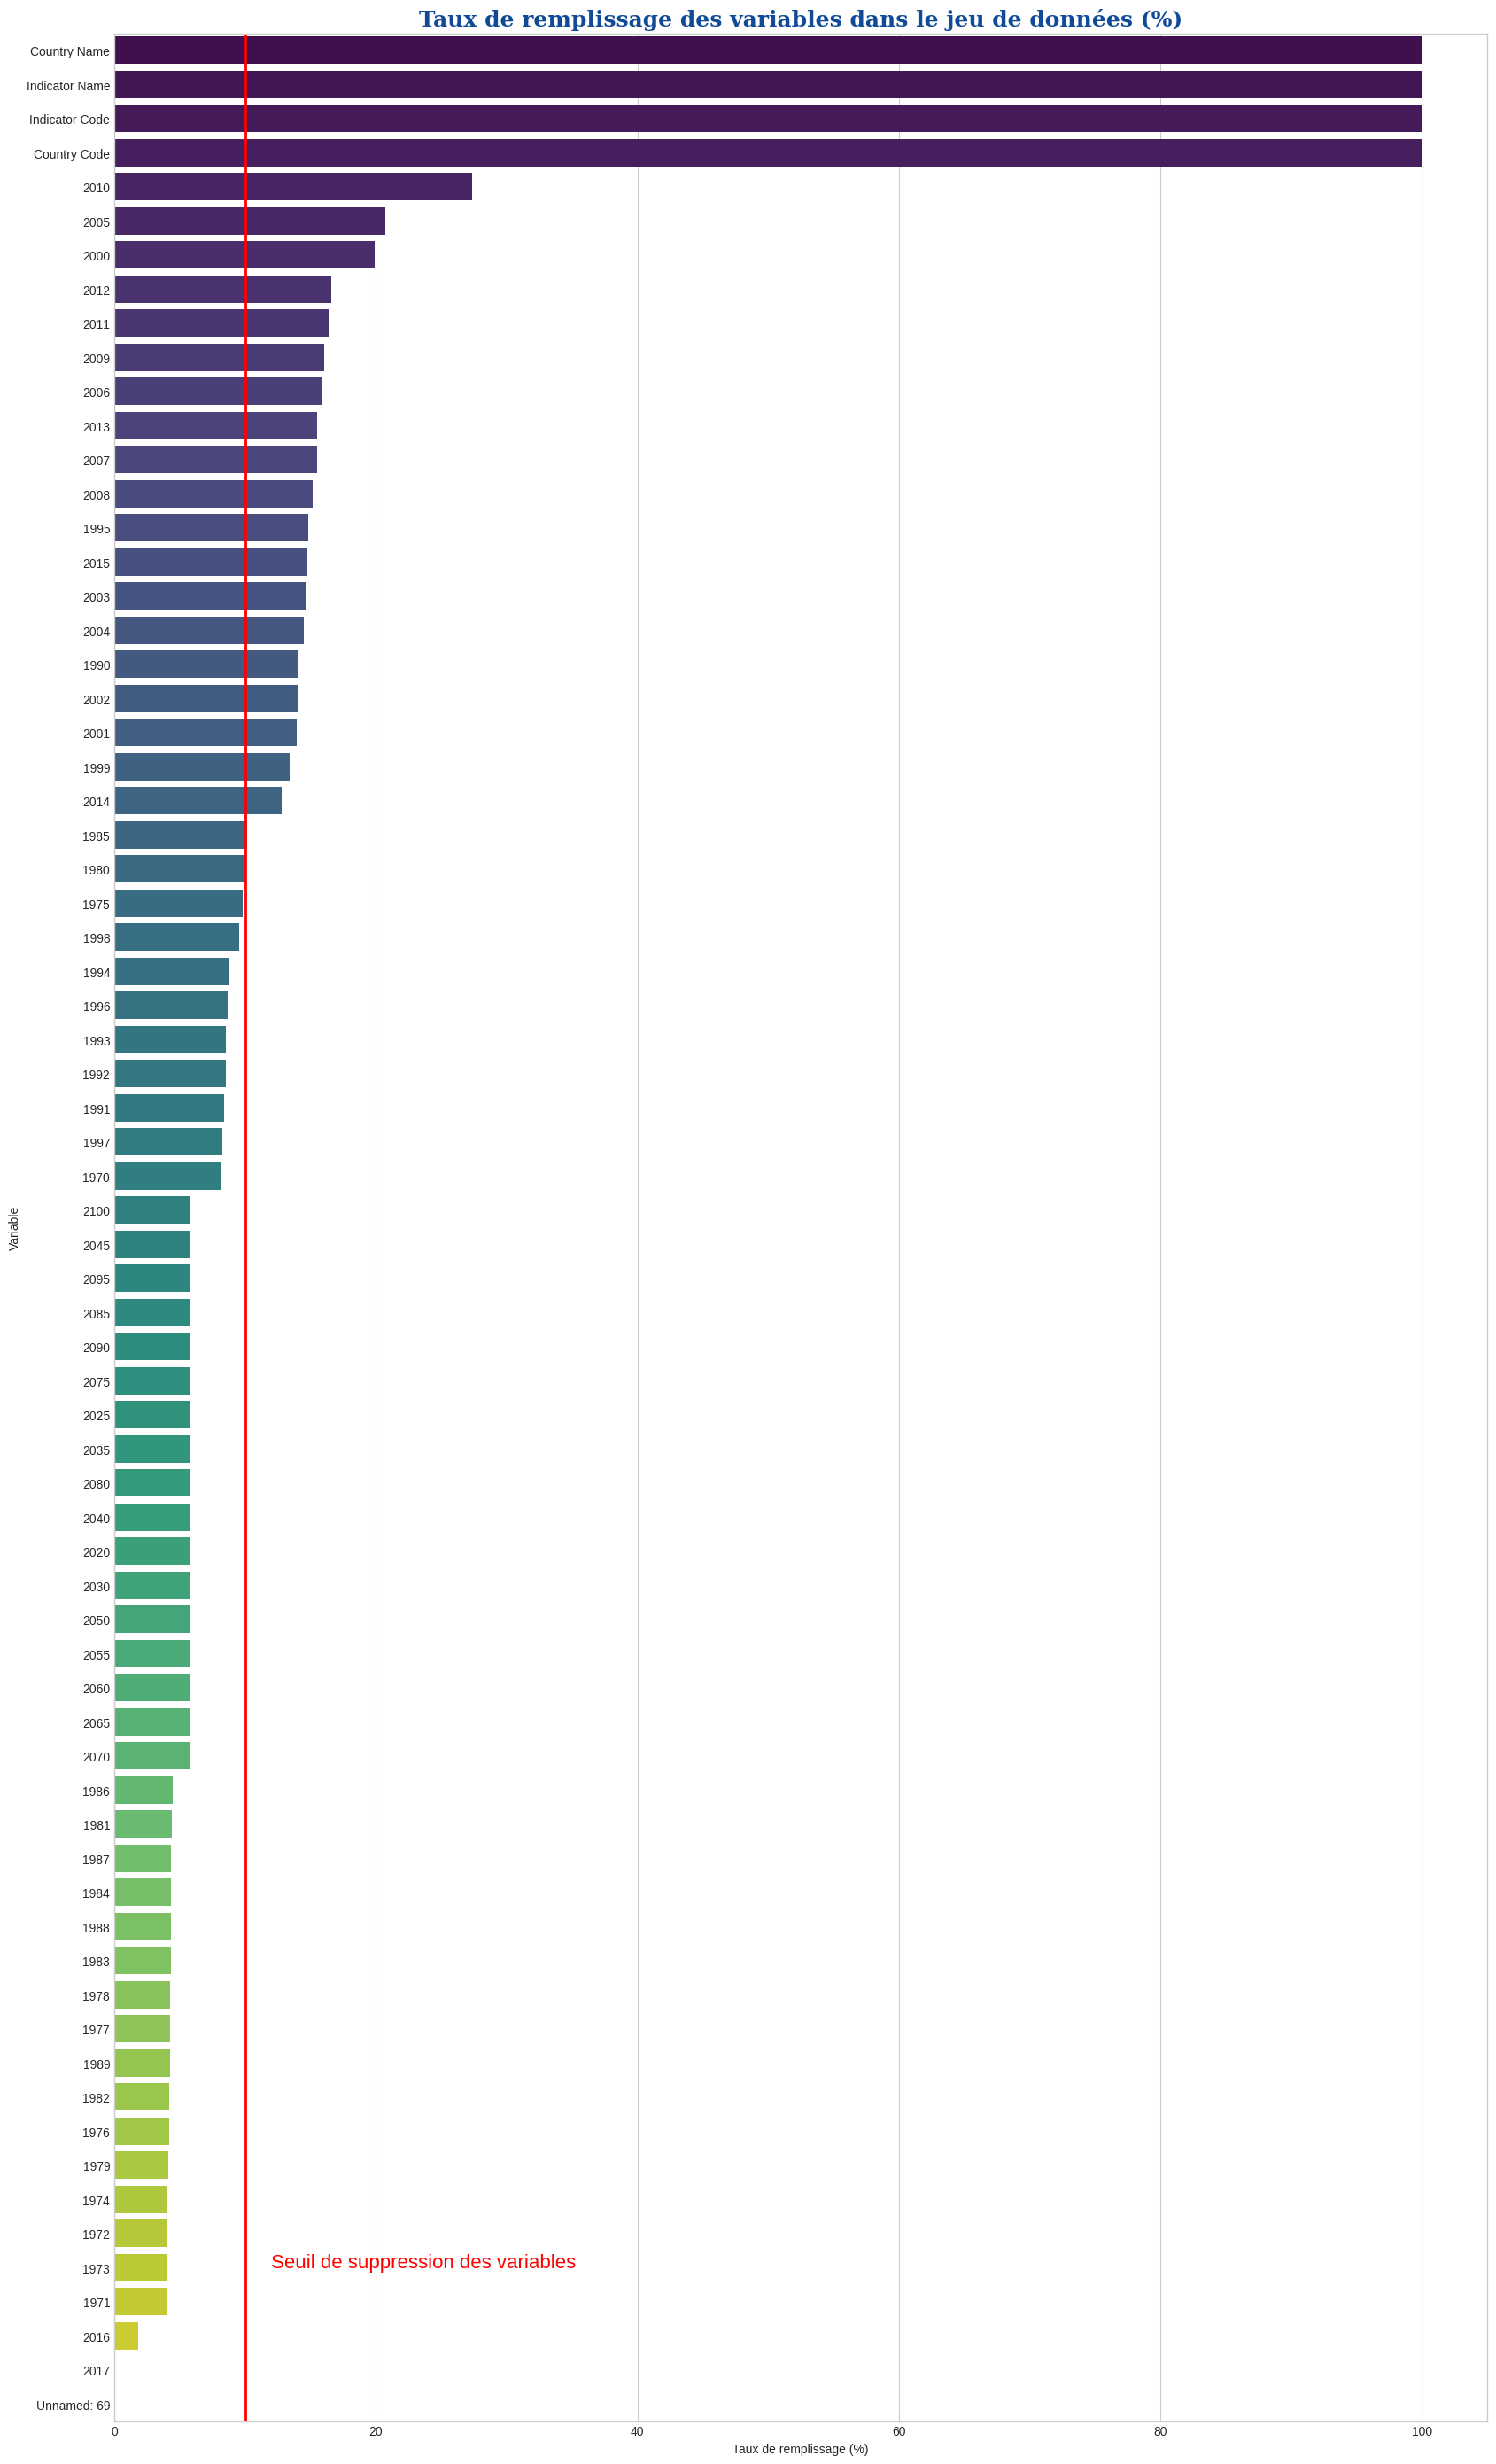

<Figure size 640x480 with 0 Axes>

In [940]:
filling_features = null_factor(data, 0)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False)

#Seuil de suppression
sup_threshold = 10

fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="viridis")
#Seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()
plt.savefig("Taux de remplissage des variables dans le jeu de données (%).png")

In [941]:
#Liste des variables à conserver
features_to_conserve = list(filling_features.loc[filling_features['Taux_de_Null']>=sup_threshold, 'Variable'].values)
#Liste des variables supprimées
deleted_features = list(filling_features.loc[filling_features['Taux_de_Null']<sup_threshold, 'Variable'].values)

#Nouveau Dataset avec les variables conservées
data = data[features_to_conserve].sort_values(["Country Name"], ascending=True)
data.sample(5)

,Country Name,Indicator Name,Indicator Code,Country Code,2010,2005,2000,2012,2011,2009,...,2015,2003,2004,1990,2002,2001,1999,2014,1985,1980
691963,San Marino,"Share of youth not in education, employment, o...",SL.UEM.NEET.FE.ZS,SMR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282713,Czech Republic,"Barro-Lee: Population in thousands, age 75+, t...",BAR.POP.75UP,CZE,677.0,636.0,559.0,NaN,NaN,NaN,...,NaN,NaN,NaN,542.0,NaN,NaN,NaN,NaN,510.0,464.0
53021,Lower middle income,PASEC: 2nd grade students by mathematics profi...,LO.PASEC.MAT.2.L1,LMC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25890,Heavily indebted poor countries (HIPC),Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.7074.FE,HPC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199646,Bulgaria,PASEC: Average performance gap between 2nd gra...,LO.PASEC.MAT.2.MG.GAP,BGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [942]:
#data.drop(['Unnamed: 69'], inplace = True,  axis=1)

In [943]:
#data['Indicator Name'].unique()
data['Indicator Name'].value_counts().index.tolist()

['PASEC: Mean performance on the mathematics scale for 6th grade students who did not attend pre-primary education',
 'PASEC: Mean performance on the mathematics scale for 6th grade students. Female',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 

In [944]:
#data1=data.loc[data['Indicator Name'].isin(['Internet users (per 100 people)', 'Personal computers (per 100 people)',
#                                            'GDP per capita (constant 2005 US$)', 'Population growth (annual %)'
#                                           'Population of the official entrance age to secondary general education, both sexes (number)',
#                                            'Population, total','Adult literacy rate, population 15+ years, both sexes (%)',
#                                           'Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)',
#                                            'Gross enrolment ratio, upper secondary, both sexes (%)',
#                                          'Proportion of upper secondary schools with access to computers for pedagogical purposes (%)',
#                                           'Proportion of upper secondary schools with access to electricity (%)'
#                                          ])]
#data1

In [945]:
#Sélection des indicateurs pertinents:
data1=data.loc[data['Indicator Name'].isin(['Population, total',
 'Population of the official age for upper secondary education, both sexes (number)',
 'Population, ages 15-24, total',
 'Personal computers (per 100 people)',
 'Population of the official age for tertiary education, both sexes (number)',
 'GDP per capita, PPP (current international $)',
 'Internet users (per 100 people)',
 'Population growth (annual %)',
 'Population of the official age for secondary education, both sexes (number)'
 ])]
data1

,Country Name,Indicator Name,Indicator Code,Country Code,2010,2005,2000,2012,2011,2009,...,2015,2003,2004,1990,2002,2001,1999,2014,1985,1980
94107,Afghanistan,"Population, ages 15-24, total",SP.POP.1524.TO.UN,AFG,6.090239e+06,4.910340e+06,3.979438e+06,6.569239e+06,6.330684e+06,5.848604e+06,...,7.252785e+06,4.486256e+06,4.694142e+06,2.423555e+06,4.293057e+06,4.122669e+06,3.870496e+06,7.032072e+06,NaN,NaN
93948,Afghanistan,Population of the official age for secondary e...,SP.SEC.TOTL.IN,AFG,3.839021e+06,3.292878e+06,2.650420e+06,4.262522e+06,4.044521e+06,3.672349e+06,...,4.850112e+06,3.055436e+06,3.184103e+06,1.624724e+06,2.915857e+06,2.777395e+06,2.557044e+06,4.676453e+06,1.532935e+06,1.731233e+06
93951,Afghanistan,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,AFG,2.490352e+06,2.304393e+06,1.760125e+06,2.724642e+06,2.595965e+06,2.438519e+06,...,3.199607e+06,2.085468e+06,2.201216e+06,1.070442e+06,1.965626e+06,1.854199e+06,1.702356e+06,3.034517e+06,1.030659e+06,1.177931e+06
93957,Afghanistan,Population of the official age for upper secon...,SP.SEC.UTOT.IN,AFG,1.765556e+06,1.570386e+06,1.245988e+06,1.977811e+06,1.864912e+06,1.700525e+06,...,2.305137e+06,1.449172e+06,1.514752e+06,7.588670e+05,1.378528e+06,1.309228e+06,1.203174e+06,2.206482e+06,7.223100e+05,8.183940e+05
93932,Afghanistan,Population growth (annual %),SP.POP.GROW,AFG,2.812617e+00,3.870470e+00,3.494659e+00,3.272703e+00,3.095119e+00,2.569114e+00,...,2.943234e+00,4.818041e+00,4.468918e+00,3.925342e+00,4.720528e+00,4.251504e+00,2.820724e+00,3.183201e+00,-2.216315e+00,-4.392766e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885572,Zimbabwe,Population growth (annual %),SP.POP.GROW,ZWE,1.976756e+00,1.263909e+00,1.298782e+00,2.228306e+00,2.109672e+00,1.842497e+00,...,2.345643e+00,1.061280e+00,1.130323e+00,2.793947e+00,1.080653e+00,1.170597e+00,1.429746e+00,2.344799e+00,3.725636e+00,3.441809e+00
885798,Zimbabwe,"Population, total",SP.POP.TOTL,ZWE,1.408632e+07,1.294003e+07,1.222225e+07,1.471083e+07,1.438665e+07,1.381060e+07,...,1.577745e+07,1.263390e+07,1.277751e+07,1.018311e+07,1.250052e+07,1.236616e+07,1.206454e+07,1.541168e+07,8.658857e+06,7.164172e+06
885349,Zimbabwe,Personal computers (per 100 people),IT.CMP.PCMP.P2,ZWE,NaN,6.687338e+00,1.559544e+00,NaN,NaN,NaN,...,NaN,4.892251e+00,5.514830e+00,1.911720e-02,4.746489e+00,1.588971e+00,1.211169e+00,NaN,NaN,NaN
884640,Zimbabwe,Internet users (per 100 people),IT.NET.USER.P2,ZWE,6.400000e+00,2.400000e+00,4.014335e-01,1.200000e+01,8.400000e+00,4.000000e+00,...,2.274282e+01,1.800000e+00,2.100000e+00,0.000000e+00,1.100000e+00,7.998460e-01,1.616755e-01,1.636474e+01,NaN,NaN


In [946]:
data1.isnull().sum(axis = 0)

Country Name         0
Indicator Name       0
Indicator Code       0
Country Code         0
2010               419
2005               217
2000               241
2012               444
2011               431
2009               410
2006               301
2013               451
2007               366
2008               388
1995               392
2015               567
2003               213
2004               210
1990               384
2002               203
2001               212
1999               252
2014               440
1985              1053
1980              1058
dtype: int64

In [947]:
data1.describe(include='all')

,Country Name,Indicator Name,Indicator Code,Country Code,2010,2005,2000,2012,2011,2009,...,2015,2003,2004,1990,2002,2001,1999,2014,1985,1980
count,2178,2178,2178,2178,1.759000e+03,1.961000e+03,1.937000e+03,1.734000e+03,1.747000e+03,1.768000e+03,...,1.611000e+03,1.965000e+03,1.968000e+03,1.794000e+03,1.975000e+03,1.966000e+03,1.926000e+03,1.738000e+03,1.125000e+03,1.120000e+03
unique,242,9,9,242,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,"Population, ages 15-24, total",SP.POP.1524.TO.UN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,242,242,9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.410573e+07,2.911392e+07,2.751169e+07,3.521205e+07,3.466038e+07,3.365685e+07,...,3.424104e+07,2.831311e+07,2.864997e+07,2.593075e+07,2.778184e+07,2.752047e+07,2.729407e+07,3.451407e+07,3.727152e+07,3.416189e+07
std,NaN,NaN,NaN,NaN,2.896826e+08,2.587127e+08,2.442300e+08,2.985320e+08,2.940184e+08,2.856014e+08,...,3.178233e+08,2.520968e+08,2.550864e+08,2.187194e+08,2.482879e+08,2.456591e+08,2.416232e+08,3.034144e+08,2.513604e+08,2.298634e+08
min,NaN,NaN,NaN,NaN,-3.333512e+00,-2.966054e+00,-4.075386e+00,-2.147571e+00,-2.628656e+00,-3.332301e+00,...,-2.467847e+00,-1.969444e+00,-2.643577e+00,-1.803750e+00,-2.170699e+00,-3.771878e+00,-1.095515e+01,-3.107229e+00,-2.216315e+00,-1.404240e+00
25%,NaN,NaN,NaN,NaN,7.214021e+01,1.267510e+01,5.348560e+00,7.402303e+01,7.177961e+01,6.985000e+01,...,7.327500e+01,8.290790e+00,1.038955e+01,2.623439e+00,6.807660e+00,5.240698e+00,3.980642e+00,8.627510e+01,8.133000e+03,8.094000e+03
50%,NaN,NaN,NaN,NaN,1.076250e+05,4.043810e+04,3.837300e+04,1.155930e+05,1.105460e+05,1.098080e+05,...,8.388200e+04,3.623000e+04,3.701500e+04,6.940150e+04,3.431400e+04,3.456050e+04,4.012950e+04,1.250295e+05,3.918430e+05,3.648795e+05
75%,NaN,NaN,NaN,NaN,2.278359e+06,1.623424e+06,1.499177e+06,2.472195e+06,2.379732e+06,2.249936e+06,...,1.873922e+06,1.510380e+06,1.569350e+06,1.547118e+06,1.476749e+06,1.480624e+06,1.538705e+06,2.385817e+06,3.570000e+06,3.251968e+06


In [948]:
data2=data1[['Country Name','Country Code','Indicator Name','Indicator Code','2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014']]
data2

,Country Name,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014
94107,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,5.134377e+06,5.367499e+06,5.606736e+06,5.848604e+06,6.090239e+06,6.330684e+06,6.569239e+06,6.803785e+06,7.032072e+06
93948,Afghanistan,AFG,Population of the official age for secondary e...,SP.SEC.TOTL.IN,3.363934e+06,3.443063e+06,3.542738e+06,3.672349e+06,3.839021e+06,4.044521e+06,4.262522e+06,4.477827e+06,4.676453e+06
93951,Afghanistan,AFG,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.348976e+06,2.378682e+06,2.404018e+06,2.438519e+06,2.490352e+06,2.595965e+06,2.724642e+06,2.873526e+06,3.034517e+06
93957,Afghanistan,AFG,Population of the official age for upper secon...,SP.SEC.UTOT.IN,1.597963e+06,1.625093e+06,1.656586e+06,1.700525e+06,1.765556e+06,1.864912e+06,1.977811e+06,2.095149e+06,2.206482e+06
93932,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,3.228630e+00,2.755225e+00,2.512574e+00,2.569114e+00,2.812617e+00,3.095119e+00,3.272703e+00,3.315224e+00,3.183201e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,1.413720e+00,1.554735e+00,1.700106e+00,1.842497e+00,1.976756e+00,2.109672e+00,2.228306e+00,2.309366e+00,2.344799e+00
885798,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,1.312427e+07,1.332991e+07,1.355847e+07,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07
885349,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,6.798012e+00,NaN,7.431140e+00,NaN,NaN,NaN,NaN,NaN,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,2.400000e+00,3.000000e+00,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01


In [949]:
data2.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
dtype: object

In [950]:
data2.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2006              0.138200
2007              0.168044
2008              0.178145
2009              0.188246
2010              0.192378
2011              0.197888
2012              0.203857
2013              0.207071
2014              0.202020
dtype: float64

In [951]:
#Ici on decide de garder uniquement les années pertinentesc'est à dire les années ayant le plus de données.
data3=data2.dropna(subset=['2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014'], thresh=9)
data3

,Country Name,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014
94107,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,5.134377e+06,5.367499e+06,5.606736e+06,5.848604e+06,6.090239e+06,6.330684e+06,6.569239e+06,6.803785e+06,7.032072e+06
93948,Afghanistan,AFG,Population of the official age for secondary e...,SP.SEC.TOTL.IN,3.363934e+06,3.443063e+06,3.542738e+06,3.672349e+06,3.839021e+06,4.044521e+06,4.262522e+06,4.477827e+06,4.676453e+06
93951,Afghanistan,AFG,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.348976e+06,2.378682e+06,2.404018e+06,2.438519e+06,2.490352e+06,2.595965e+06,2.724642e+06,2.873526e+06,3.034517e+06
93957,Afghanistan,AFG,Population of the official age for upper secon...,SP.SEC.UTOT.IN,1.597963e+06,1.625093e+06,1.656586e+06,1.700525e+06,1.765556e+06,1.864912e+06,1.977811e+06,2.095149e+06,2.206482e+06
93932,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,3.228630e+00,2.755225e+00,2.512574e+00,2.569114e+00,2.812617e+00,3.095119e+00,3.272703e+00,3.315224e+00,3.183201e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885597,Zimbabwe,ZWE,Population of the official age for upper secon...,SP.SEC.UTOT.IN,1.341028e+06,1.338730e+06,1.337559e+06,1.337565e+06,1.338788e+06,1.331526e+06,1.327364e+06,1.327040e+06,1.331677e+06
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,1.413720e+00,1.554735e+00,1.700106e+00,1.842497e+00,1.976756e+00,2.109672e+00,2.228306e+00,2.309366e+00,2.344799e+00
885798,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,1.312427e+07,1.332991e+07,1.355847e+07,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,2.400000e+00,3.000000e+00,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01


In [952]:
#On renomme les années en datetime pour l'utilisation des timeseries
data3.rename(columns = {'2006':'2006-01-01', '2007':'2007-01-01',
                        '2008':'2008-01-01','2009':'2009-01-01', '2010':'2010-01-01',
                        '2011':'2011-01-01', '2012':'2012-01-01','2013':'2013-01-01', '2014':'2014-01-01',}, inplace = True)

<ipython-input-952-0741ad9ab642>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [953]:
# Jointure des fichiers country et data
tab=pd.merge(country, data3, on='Country Name', how='left', indicator=True)
tab

,Country Code_x,Country Name,Region,Country Code_y,Indicator Name,Indicator Code,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,_merge
0,ABW,Aruba,Latin America & Caribbean,ABW,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1.326000e+04,1.329800e+04,1.326000e+04,1.323600e+04,1.329900e+04,1.346600e+04,1.370800e+04,1.399000e+04,1.425300e+04,both
1,ABW,Aruba,Latin America & Caribbean,ABW,Population of the official age for secondary e...,SP.SEC.TOTL.IN,7.641000e+03,7.658000e+03,7.681000e+03,7.691000e+03,7.662000e+03,7.605000e+03,7.535000e+03,7.493000e+03,7.457000e+03,both
2,ABW,Aruba,Latin America & Caribbean,ABW,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,6.776000e+03,6.579000e+03,6.362000e+03,6.210000e+03,6.237000e+03,6.464000e+03,6.942000e+03,7.292000e+03,7.528000e+03,both
3,ABW,Aruba,Latin America & Caribbean,ABW,Population of the official age for upper secon...,SP.SEC.UTOT.IN,4.479000e+03,4.486000e+03,4.543000e+03,4.607000e+03,4.623000e+03,4.594000e+03,4.553000e+03,4.529000e+03,4.510000e+03,both
4,ABW,Aruba,Latin America & Caribbean,ABW,Population growth (annual %),SP.POP.GROW,7.975628e-01,3.840600e-01,1.313107e-01,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,ZWE,Zimbabwe,Sub-Saharan Africa,ZWE,Population of the official age for upper secon...,SP.SEC.UTOT.IN,1.341028e+06,1.338730e+06,1.337559e+06,1.337565e+06,1.338788e+06,1.331526e+06,1.327364e+06,1.327040e+06,1.331677e+06,both
1501,ZWE,Zimbabwe,Sub-Saharan Africa,ZWE,Population growth (annual %),SP.POP.GROW,1.413720e+00,1.554735e+00,1.700106e+00,1.842497e+00,1.976756e+00,2.109672e+00,2.228306e+00,2.309366e+00,2.344799e+00,both
1502,ZWE,Zimbabwe,Sub-Saharan Africa,ZWE,"Population, total",SP.POP.TOTL,1.312427e+07,1.332991e+07,1.355847e+07,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07,both
1503,ZWE,Zimbabwe,Sub-Saharan Africa,ZWE,Internet users (per 100 people),IT.NET.USER.P2,2.400000e+00,3.000000e+00,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,both


In [954]:
#Vérification du merge
tab['_merge'].unique()

['both', 'left_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [955]:
#Supression des lignes 'left_only' et 'right_only'
tab=tab[(tab._merge == 'both')]


In [956]:
tab

,Country Code_x,Country Name,Region,Country Code_y,Indicator Name,Indicator Code,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,_merge
0,ABW,Aruba,Latin America & Caribbean,ABW,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1.326000e+04,1.329800e+04,1.326000e+04,1.323600e+04,1.329900e+04,1.346600e+04,1.370800e+04,1.399000e+04,1.425300e+04,both
1,ABW,Aruba,Latin America & Caribbean,ABW,Population of the official age for secondary e...,SP.SEC.TOTL.IN,7.641000e+03,7.658000e+03,7.681000e+03,7.691000e+03,7.662000e+03,7.605000e+03,7.535000e+03,7.493000e+03,7.457000e+03,both
2,ABW,Aruba,Latin America & Caribbean,ABW,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,6.776000e+03,6.579000e+03,6.362000e+03,6.210000e+03,6.237000e+03,6.464000e+03,6.942000e+03,7.292000e+03,7.528000e+03,both
3,ABW,Aruba,Latin America & Caribbean,ABW,Population of the official age for upper secon...,SP.SEC.UTOT.IN,4.479000e+03,4.486000e+03,4.543000e+03,4.607000e+03,4.623000e+03,4.594000e+03,4.553000e+03,4.529000e+03,4.510000e+03,both
4,ABW,Aruba,Latin America & Caribbean,ABW,Population growth (annual %),SP.POP.GROW,7.975628e-01,3.840600e-01,1.313107e-01,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,ZWE,Zimbabwe,Sub-Saharan Africa,ZWE,Population of the official age for upper secon...,SP.SEC.UTOT.IN,1.341028e+06,1.338730e+06,1.337559e+06,1.337565e+06,1.338788e+06,1.331526e+06,1.327364e+06,1.327040e+06,1.331677e+06,both
1501,ZWE,Zimbabwe,Sub-Saharan Africa,ZWE,Population growth (annual %),SP.POP.GROW,1.413720e+00,1.554735e+00,1.700106e+00,1.842497e+00,1.976756e+00,2.109672e+00,2.228306e+00,2.309366e+00,2.344799e+00,both
1502,ZWE,Zimbabwe,Sub-Saharan Africa,ZWE,"Population, total",SP.POP.TOTL,1.312427e+07,1.332991e+07,1.355847e+07,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07,both
1503,ZWE,Zimbabwe,Sub-Saharan Africa,ZWE,Internet users (per 100 people),IT.NET.USER.P2,2.400000e+00,3.000000e+00,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,both


In [957]:
tab.drop(columns =['_merge','Indicator Code','Country Code_y'], inplace=True)
tab

<ipython-input-957-b40fbb463679>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country Code_x,Country Name,Region,Indicator Name,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01
0,ABW,Aruba,Latin America & Caribbean,"Population, ages 15-24, total",1.326000e+04,1.329800e+04,1.326000e+04,1.323600e+04,1.329900e+04,1.346600e+04,1.370800e+04,1.399000e+04,1.425300e+04
1,ABW,Aruba,Latin America & Caribbean,Population of the official age for secondary e...,7.641000e+03,7.658000e+03,7.681000e+03,7.691000e+03,7.662000e+03,7.605000e+03,7.535000e+03,7.493000e+03,7.457000e+03
2,ABW,Aruba,Latin America & Caribbean,Population of the official age for tertiary ed...,6.776000e+03,6.579000e+03,6.362000e+03,6.210000e+03,6.237000e+03,6.464000e+03,6.942000e+03,7.292000e+03,7.528000e+03
3,ABW,Aruba,Latin America & Caribbean,Population of the official age for upper secon...,4.479000e+03,4.486000e+03,4.543000e+03,4.607000e+03,4.623000e+03,4.594000e+03,4.553000e+03,4.529000e+03,4.510000e+03
4,ABW,Aruba,Latin America & Caribbean,Population growth (annual %),7.975628e-01,3.840600e-01,1.313107e-01,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,ZWE,Zimbabwe,Sub-Saharan Africa,Population of the official age for upper secon...,1.341028e+06,1.338730e+06,1.337559e+06,1.337565e+06,1.338788e+06,1.331526e+06,1.327364e+06,1.327040e+06,1.331677e+06
1501,ZWE,Zimbabwe,Sub-Saharan Africa,Population growth (annual %),1.413720e+00,1.554735e+00,1.700106e+00,1.842497e+00,1.976756e+00,2.109672e+00,2.228306e+00,2.309366e+00,2.344799e+00
1502,ZWE,Zimbabwe,Sub-Saharan Africa,"Population, total",1.312427e+07,1.332991e+07,1.355847e+07,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07
1503,ZWE,Zimbabwe,Sub-Saharan Africa,Internet users (per 100 people),2.400000e+00,3.000000e+00,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01


### D. Fichier "foot_note"

In [958]:
fn=pd.read_csv('/content/foot_note.csv')
fn

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
...,...,...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN


In [959]:
fn.head(20)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


In [960]:
fn.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [961]:
fn.isna().mean()

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

In [962]:
fn.describe(include='all')

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
count,643638,643638,643638,643638,0.0
unique,239,1558,56,9102,NaN
top,LIC,SH.DYN.MORT,YR2004,Country Data,NaN
freq,7320,9226,27128,191188,NaN
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN


## <span style="color:red">Le fichier "fn" ne semble pas pertinent aux vues des informations. Nous ne travaillerons pas avec celui-ci</span> ##

### E. Fichier "series"

In [963]:
series=pd.read_csv('/content/series.csv')
series

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [964]:
series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [965]:
series.describe(include='all')

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
count,3665,3665,3665,2156,3665,0.0,99,314,552,47,...,0.0,14,3665,23,3,215,0.0,0.0,0.0,0.0
unique,3665,37,3665,1169,2060,NaN,1,4,14,3,...,NaN,8,31,2,1,1,NaN,NaN,NaN,NaN
top,BAR.NOED.1519.FE.ZS,Learning Outcomes,Barro-Lee: Percentage of female population age...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,Annual,Projections (2010 to 2100),EGRA,Weighted average,...,NaN,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
freq,1,1046,1,215,215,NaN,99,308,403,31,...,NaN,3,1269,20,3,215,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [966]:
series.isna().mean()

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                        1.000000
Related indicators                     1.000000
License Type                           1.000000
Unnamed: 20                            1

## <span style="color:red">Le fichier "series" ne semble pas pertinent aux vues des informations. Nous ne travaillerons pas avec celui-ci</span> ##

## II. Exploration des données ##

Le nettoyage des fichier nous a permis de nous concentrer sur 2 fichiers: "country" et 'data', ces deux fichiers ont étés joints, sous le nom de "tab".

In [967]:
tab.dropna(axis=1, how="all", inplace=True)
tab

<ipython-input-967-a190a111d1db>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country Code_x,Country Name,Region,Indicator Name,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01
0,ABW,Aruba,Latin America & Caribbean,"Population, ages 15-24, total",1.326000e+04,1.329800e+04,1.326000e+04,1.323600e+04,1.329900e+04,1.346600e+04,1.370800e+04,1.399000e+04,1.425300e+04
1,ABW,Aruba,Latin America & Caribbean,Population of the official age for secondary e...,7.641000e+03,7.658000e+03,7.681000e+03,7.691000e+03,7.662000e+03,7.605000e+03,7.535000e+03,7.493000e+03,7.457000e+03
2,ABW,Aruba,Latin America & Caribbean,Population of the official age for tertiary ed...,6.776000e+03,6.579000e+03,6.362000e+03,6.210000e+03,6.237000e+03,6.464000e+03,6.942000e+03,7.292000e+03,7.528000e+03
3,ABW,Aruba,Latin America & Caribbean,Population of the official age for upper secon...,4.479000e+03,4.486000e+03,4.543000e+03,4.607000e+03,4.623000e+03,4.594000e+03,4.553000e+03,4.529000e+03,4.510000e+03
4,ABW,Aruba,Latin America & Caribbean,Population growth (annual %),7.975628e-01,3.840600e-01,1.313107e-01,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,ZWE,Zimbabwe,Sub-Saharan Africa,Population of the official age for upper secon...,1.341028e+06,1.338730e+06,1.337559e+06,1.337565e+06,1.338788e+06,1.331526e+06,1.327364e+06,1.327040e+06,1.331677e+06
1501,ZWE,Zimbabwe,Sub-Saharan Africa,Population growth (annual %),1.413720e+00,1.554735e+00,1.700106e+00,1.842497e+00,1.976756e+00,2.109672e+00,2.228306e+00,2.309366e+00,2.344799e+00
1502,ZWE,Zimbabwe,Sub-Saharan Africa,"Population, total",1.312427e+07,1.332991e+07,1.355847e+07,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07
1503,ZWE,Zimbabwe,Sub-Saharan Africa,Internet users (per 100 people),2.400000e+00,3.000000e+00,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01


In [968]:
tab.dtypes

Country Code_x     object
Country Name       object
Region             object
Indicator Name     object
2006-01-01        float64
2007-01-01        float64
2008-01-01        float64
2009-01-01        float64
2010-01-01        float64
2011-01-01        float64
2012-01-01        float64
2013-01-01        float64
2014-01-01        float64
dtype: object

In [969]:
# years in line, coutry name and indicator as columns
melted_df = tab.melt(id_vars=["Country Name", "Indicator Name","Country Code_x","Region"], var_name="year", value_name="value")
melted_df

,Country Name,Indicator Name,Country Code_x,Region,year,value
0,Aruba,"Population, ages 15-24, total",ABW,Latin America & Caribbean,2006-01-01,1.326000e+04
1,Aruba,Population of the official age for secondary e...,ABW,Latin America & Caribbean,2006-01-01,7.641000e+03
2,Aruba,Population of the official age for tertiary ed...,ABW,Latin America & Caribbean,2006-01-01,6.776000e+03
3,Aruba,Population of the official age for upper secon...,ABW,Latin America & Caribbean,2006-01-01,4.479000e+03
4,Aruba,Population growth (annual %),ABW,Latin America & Caribbean,2006-01-01,7.975628e-01
...,...,...,...,...,...,...
13261,Zimbabwe,Population of the official age for upper secon...,ZWE,Sub-Saharan Africa,2014-01-01,1.331677e+06
13262,Zimbabwe,Population growth (annual %),ZWE,Sub-Saharan Africa,2014-01-01,2.344799e+00
13263,Zimbabwe,"Population, total",ZWE,Sub-Saharan Africa,2014-01-01,1.541168e+07
13264,Zimbabwe,Internet users (per 100 people),ZWE,Sub-Saharan Africa,2014-01-01,1.636474e+01


In [970]:
melted_df['value'] = melted_df['value'].astype(float)

pivoted_df = melted_df.pivot_table(index=["year", "Country Name", "Country Code_x"], columns="Indicator Name",
                                   values="value").reset_index()
pivoted_df

Indicator Name,year,Country Name,Country Code_x,"GDP per capita, PPP (current international $)",Internet users (per 100 people),Population growth (annual %),"Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, ages 15-24, total","Population, total"
0,2006-01-01,Afghanistan,AFG,1065.619665,2.107124,3.228630,3363934.0,2348976.0,1597963.0,5134377.0,2.589345e+07
1,2006-01-01,Albania,ALB,6634.779222,9.609991,-0.630911,524630.0,280788.0,266811.0,594862.0,2.992547e+06
2,2006-01-01,Algeria,DZA,11332.789898,7.375985,1.459709,4593031.0,3852881.0,2330798.0,7434877.0,3.377792e+07
3,2006-01-01,American Samoa,ASM,NaN,NaN,-0.794787,NaN,NaN,NaN,NaN,5.865000e+04
4,2006-01-01,Andorra,AND,NaN,48.936847,2.657515,NaN,NaN,NaN,NaN,8.099100e+04
...,...,...,...,...,...,...,...,...,...,...,...
1885,2014-01-01,Vietnam,VNM,5656.954905,41.000000,1.074207,9611766.0,8833084.0,4338223.0,17298090.0,9.072890e+07
1886,2014-01-01,West Bank and Gaza,PSE,NaN,53.670000,2.957995,862381.0,486140.0,209646.0,1016961.0,4.294682e+06
1887,2014-01-01,World,WLD,15243.665797,39.938698,1.199050,757088256.0,602372672.0,381429696.0,NaN,7.268986e+09
1888,2014-01-01,Zambia,ZMB,3826.464402,19.000000,3.040211,1763278.0,1497656.0,1020428.0,2995938.0,1.562097e+07


In [971]:
# convert year to int
pivoted_df['year'] = pivoted_df['year'].astype(str)


In [972]:
print(pivoted_df)

Indicator Name        year        Country Name Country Code_x  \
0               2006-01-01         Afghanistan            AFG   
1               2006-01-01             Albania            ALB   
2               2006-01-01             Algeria            DZA   
3               2006-01-01      American Samoa            ASM   
4               2006-01-01             Andorra            AND   
...                    ...                 ...            ...   
1885            2014-01-01             Vietnam            VNM   
1886            2014-01-01  West Bank and Gaza            PSE   
1887            2014-01-01               World            WLD   
1888            2014-01-01              Zambia            ZMB   
1889            2014-01-01            Zimbabwe            ZWE   

Indicator Name  GDP per capita, PPP (current international $)  \
0                                                 1065.619665   
1                                                 6634.779222   
2                       

In [973]:
print ("Le dataset compte {} lignes et {} variables".format(tab.shape[0], tab.shape[1]))

Le dataset compte 1474 lignes et 13 variables


In [974]:
def plot_indicator_evolution(df, indicator, countries=None, start_year=None):
    """
    Plots the evolution of the given indicator by country.

    :param df: The pivoted DataFrame with year, country_name, and indicators as columns
    :param indicator: The name of the indicator to plot
    :param countries: A list of country names to include in the plot. If None, all countries will be included.
    :param start_year: The starting year for the plot. If None, the earliest year in the DataFrame will be used.
    """

    if countries is None:
        countries = df["Country Name"].unique()

    if start_year is not None:
        df = df[df["year"] >= start_year]

    plt.figure(figsize=(10, 6))


    for country in countries:
        country_data = df[df["Country Name"] == country]
        plt.plot(country_data["year"], country_data[indicator], label=country)

    plt.xlabel("Year")
    plt.ylabel(indicator)
    plt.title(f"Evolution of {indicator} by Country")
    plt.legend(fontsize="5")
    plt.show()

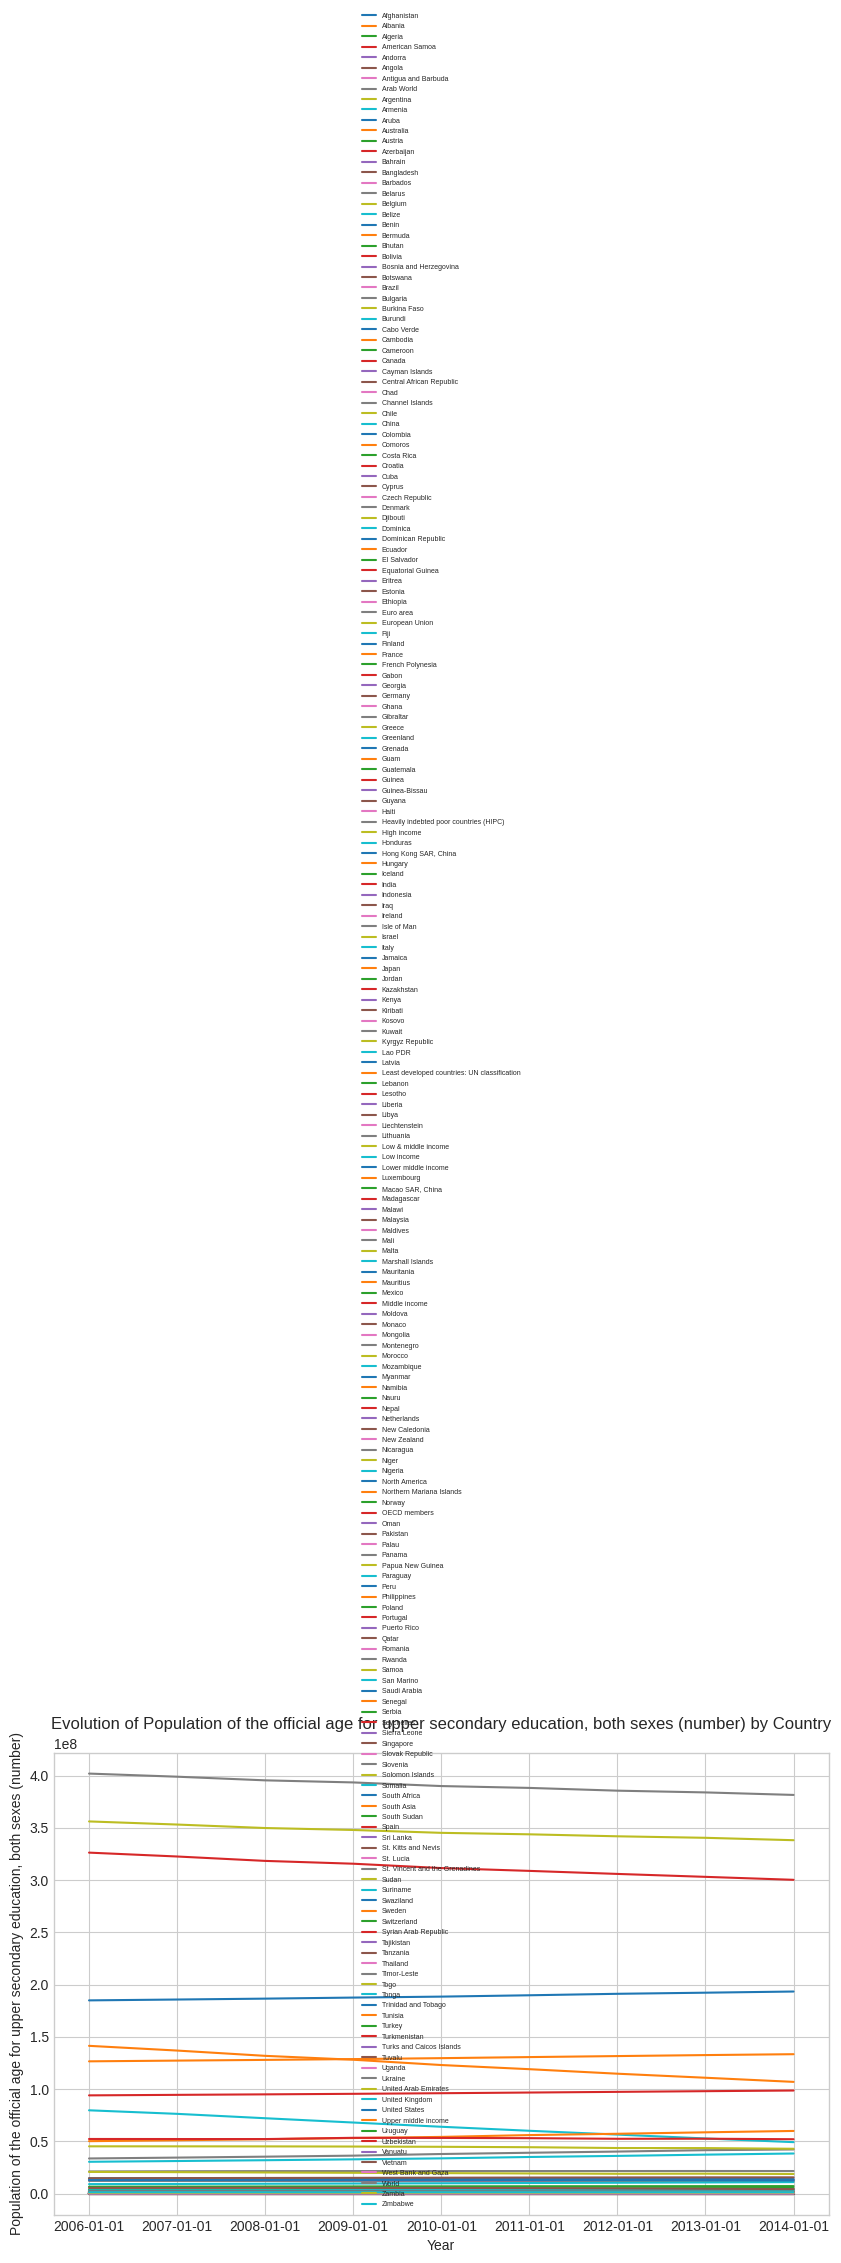

In [975]:
plot_indicator_evolution(pivoted_df, "Population of the official age for upper secondary education, both sexes (number)"
                         #, countries=["France", "Canada"]
                         , start_year="2006-01-01"
                        )

In [976]:
def null_factor(df, tx_threshold=50):
  null_rate = ((pivoted_df.isnull().sum() / pivoted_df.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Variable','Taux_de_Null']
  high_null_rate = null_rate[null_rate.Taux_de_Null >= tx_threshold]
  return high_null_rate

In [977]:
full_null_rate = null_factor(pivoted_df, 0)
full_null_rate
plt.savefig("full_null_rate.png")

<Figure size 640x480 with 0 Axes>

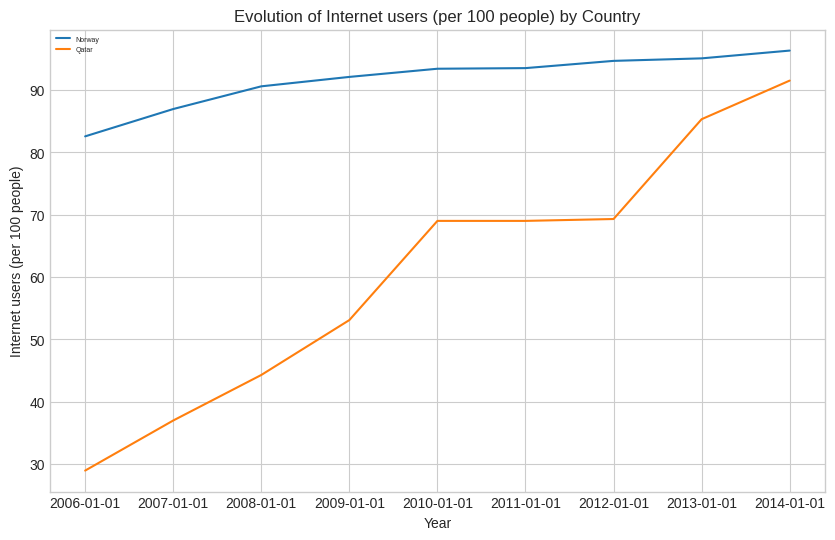

In [978]:
#exemple:
plot_indicator_evolution(pivoted_df, "Internet users (per 100 people)"
                         , countries=["Norway", "Qatar"]
                         , start_year="2006-01-01"
                        )

In [979]:
#supression de l'index la colonne 'year'
pivoted_df.reset_index()

Indicator Name,index,year,Country Name,Country Code_x,"GDP per capita, PPP (current international $)",Internet users (per 100 people),Population growth (annual %),"Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, ages 15-24, total","Population, total"
0,0,2006-01-01,Afghanistan,AFG,1065.619665,2.107124,3.228630,3363934.0,2348976.0,1597963.0,5134377.0,2.589345e+07
1,1,2006-01-01,Albania,ALB,6634.779222,9.609991,-0.630911,524630.0,280788.0,266811.0,594862.0,2.992547e+06
2,2,2006-01-01,Algeria,DZA,11332.789898,7.375985,1.459709,4593031.0,3852881.0,2330798.0,7434877.0,3.377792e+07
3,3,2006-01-01,American Samoa,ASM,NaN,NaN,-0.794787,NaN,NaN,NaN,NaN,5.865000e+04
4,4,2006-01-01,Andorra,AND,NaN,48.936847,2.657515,NaN,NaN,NaN,NaN,8.099100e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
1885,1885,2014-01-01,Vietnam,VNM,5656.954905,41.000000,1.074207,9611766.0,8833084.0,4338223.0,17298090.0,9.072890e+07
1886,1886,2014-01-01,West Bank and Gaza,PSE,NaN,53.670000,2.957995,862381.0,486140.0,209646.0,1016961.0,4.294682e+06
1887,1887,2014-01-01,World,WLD,15243.665797,39.938698,1.199050,757088256.0,602372672.0,381429696.0,NaN,7.268986e+09
1888,1888,2014-01-01,Zambia,ZMB,3826.464402,19.000000,3.040211,1763278.0,1497656.0,1020428.0,2995938.0,1.562097e+07


In [980]:
pivoted_df.groupby('Country Name')['Population, ages 15-24, total'].count()

Country Name
Afghanistan           9
Albania               9
Algeria               9
American Samoa        0
Andorra               0
                     ..
Vietnam               9
West Bank and Gaza    9
World                 0
Zambia                9
Zimbabwe              9
Name: Population, ages 15-24, total, Length: 210, dtype: int64

In [981]:
popfra= pivoted_df.loc[pivoted_df['Country Name']=='France']
popfra

Indicator Name,year,Country Name,Country Code_x,"GDP per capita, PPP (current international $)",Internet users (per 100 people),Population growth (annual %),"Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, ages 15-24, total","Population, total"
61,2006-01-01,France,FRA,32543.361262,46.870000,0.697191,5348134.0,3967837.0,2350175.0,7780124.0,63621376.0
271,2007-01-01,France,FRA,34150.601700,66.090000,0.618711,5311612.0,3975564.0,2325686.0,7753063.0,64016229.0
481,2008-01-01,France,FRA,35156.382841,70.680000,0.558857,5284899.0,3970179.0,2298182.0,7713805.0,64374990.0
691,2009-01-01,France,FRA,34767.154256,71.580000,0.514486,5272566.0,3955053.0,2274301.0,7672082.0,64707044.0
901,2010-01-01,France,FRA,36026.982564,77.280000,0.494037,5275547.0,3930005.0,2259386.0,7635485.0,65027512.0
1111,2011-01-01,France,FRA,37457.284287,77.819999,0.483645,5294246.0,3893923.0,2257825.0,7604177.0,65342776.0
1321,2012-01-01,France,FRA,37645.310279,81.440000,0.483982,5301750.0,3827966.0,2249564.0,7576981.0,65659790.0
1531,2013-01-01,France,FRA,39487.838558,81.919800,0.514636,5330642.0,3762273.0,2252936.0,7558568.0,65998570.0
1741,2014-01-01,France,FRA,40221.385421,83.750000,0.503871,5375087.0,3709990.0,2264305.0,7554426.0,66331957.0


In [982]:
#Filtrage  de 2014
pop2014= pivoted_df.loc[pivoted_df['year']=='2014-01-01']
pop2014

Indicator Name,year,Country Name,Country Code_x,"GDP per capita, PPP (current international $)",Internet users (per 100 people),Population growth (annual %),"Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, ages 15-24, total","Population, total"
1680,2014-01-01,Afghanistan,AFG,1875.447407,7.000000,3.183201,4676453.0,3034517.0,2206482.0,7032072.0,3.275802e+07
1681,2014-01-01,Albania,ALB,11332.506541,60.100000,-0.207047,345644.0,277193.0,161760.0,569427.0,2.889104e+06
1682,2014-01-01,Algeria,DZA,14203.292233,29.500000,2.000666,4140079.0,3600292.0,1862417.0,6625398.0,3.911331e+07
1683,2014-01-01,American Samoa,ASM,NaN,NaN,0.234776,NaN,NaN,NaN,NaN,5.543700e+04
1684,2014-01-01,Andorra,AND,NaN,95.900000,-1.956178,NaN,NaN,NaN,NaN,7.922300e+04
...,...,...,...,...,...,...,...,...,...,...,...
1885,2014-01-01,Vietnam,VNM,5656.954905,41.000000,1.074207,9611766.0,8833084.0,4338223.0,17298090.0,9.072890e+07
1886,2014-01-01,West Bank and Gaza,PSE,NaN,53.670000,2.957995,862381.0,486140.0,209646.0,1016961.0,4.294682e+06
1887,2014-01-01,World,WLD,15243.665797,39.938698,1.199050,757088256.0,602372672.0,381429696.0,NaN,7.268986e+09
1888,2014-01-01,Zambia,ZMB,3826.464402,19.000000,3.040211,1763278.0,1497656.0,1020428.0,2995938.0,1.562097e+07


In [983]:
top10_gpd2014=pop2014[['Country Name','GDP per capita, PPP (current international $)']].sort_values(by='GDP per capita, PPP (current international $)',ascending=False).iloc[:(10)]
top10_gpd2014

Indicator Name,Country Name,"GDP per capita, PPP (current international $)"
1792,"Macao SAR, China",137736.949815
1835,Qatar,127313.494355
1791,Luxembourg,101876.730017
1845,Singapore,84593.428145
1777,Kuwait,74613.953855
1878,United Arab Emirates,67551.002395
1822,Norway,65787.047567
1862,Switzerland,61792.294311
1839,San Marino,59643.844975
1760,"Hong Kong SAR, China",55514.510939


In [984]:
top10_pop2014=pop2014[['Country Name','Population growth (annual %)']].sort_values(by='Population growth (annual %)',ascending=False).iloc[:(20)]
top10_pop2014

Indicator Name,Country Name,Population growth (annual %)
1824,Oman,6.504660
1782,Lebanon,6.016439
1835,Qatar,5.361236
1777,Kuwait,4.988681
1772,Jordan,4.597538
1733,Equatorial Guinea,4.128421
1818,Niger,3.842681
1685,Angola,3.485413
1876,Uganda,3.350650
1716,Chad,3.264706


In [985]:
# 'Internet users (per 100 people)'
top10_2014=pop2014[['Country Name','Internet users (per 100 people)']].sort_values(by='Internet users (per 100 people)',ascending=False).iloc[:(10)]
top10_2014

Indicator Name,Country Name,Internet users (per 100 people)
1762,Iceland,98.160000
1701,Bermuda,96.800000
1822,Norway,96.300000
1727,Denmark,95.990000
1684,Andorra,95.900000
1786,Liechtenstein,95.210000
1791,Luxembourg,94.670000
1861,Sweden,92.520000
1805,Monaco,92.400000
1814,Netherlands,91.666666


Pour sélectionner les pays dans lesquels nous pourrions déployer les formations à distance, nous nous avons décidé de nous interesser principalement aux 10 pays ayant le plus fort PIB par habitants.

In [986]:
top10_gpd2014['Country Name'].value_counts().index.tolist()

['Macao SAR, China',
 'Qatar',
 'Luxembourg',
 'Singapore',
 'Kuwait',
 'United Arab Emirates',
 'Norway',
 'Switzerland',
 'San Marino',
 'Hong Kong SAR, China']

In [987]:
final_df=pivoted_df[pivoted_df['Country Name'].isin(['Macao SAR, China',
 'Qatar',
 'Luxembourg',
 'Singapore',
 'Kuwait',
 'United Arab Emirates',
 'Norway',
 'Switzerland',
 'San Marino',
 'Hong Kong SAR, China',
 ])]
final_df

Indicator Name,year,Country Name,Country Code_x,"GDP per capita, PPP (current international $)",Internet users (per 100 people),Population growth (annual %),"Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, ages 15-24, total","Population, total"
80,2006-01-01,"Hong Kong SAR, China",HKG,39940.850059,60.800000,0.642270,618896.0,467728.0,351958.0,901355.0,6857100.0
97,2006-01-01,Kuwait,KWT,88328.016067,28.791198,4.325452,225731.0,184084.0,92091.0,439691.0,2377258.0
111,2006-01-01,Luxembourg,LUX,77996.242775,72.510000,1.595052,38588.0,NaN,21518.0,54537.0,472637.0
112,2006-01-01,"Macao SAR, China",MAC,65307.164464,46.400000,2.205486,43268.0,37315.0,22096.0,81480.0,493320.0
142,2006-01-01,Norway,NOR,54110.882646,82.550000,0.805393,361547.0,276392.0,176574.0,581865.0,4660677.0
...,...,...,...,...,...,...,...,...,...,...,...
1835,2014-01-01,Qatar,QAT,127313.494355,91.490000,5.361236,NaN,187392.0,NaN,127132.0,2374419.0
1839,2014-01-01,San Marino,SMR,59643.844975,NaN,1.089912,NaN,NaN,NaN,NaN,32657.0
1845,2014-01-01,Singapore,SGP,84593.428145,79.029236,1.298440,NaN,NaN,NaN,686475.0,5469724.0
1862,2014-01-01,Switzerland,CHE,61792.294311,87.400000,1.220104,617551.0,505980.0,367576.0,964692.0,8188649.0


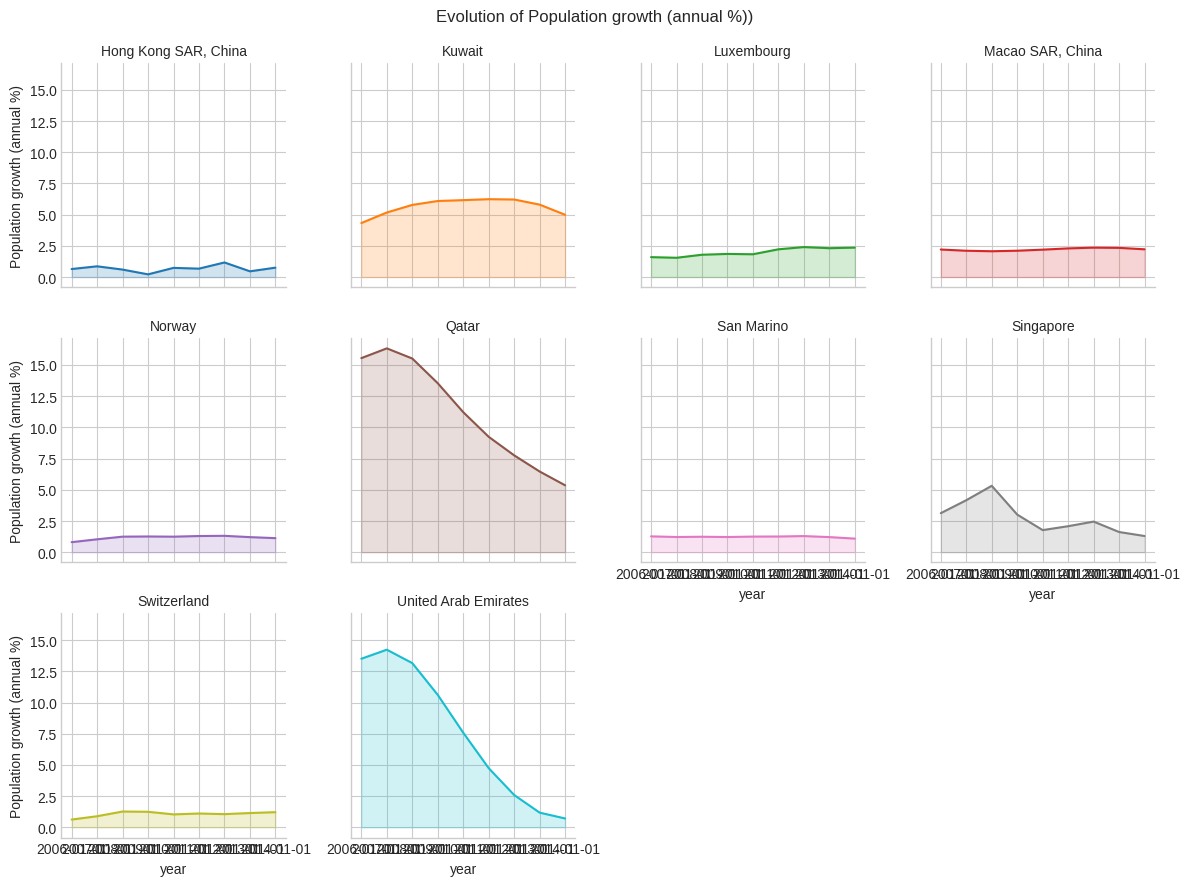

In [1043]:
# libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Create a grid : initialize it
g = sns.FacetGrid(final_df, col='Country Name', hue='Country Name', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'year', 'Population growth (annual %)')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'year', 'Population growth (annual %)', alpha=0.2).set_titles("{col_name} country")

# Control the title of each facet
g = g.set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of Population growth (annual %))')

# Show the graph
plt.show()


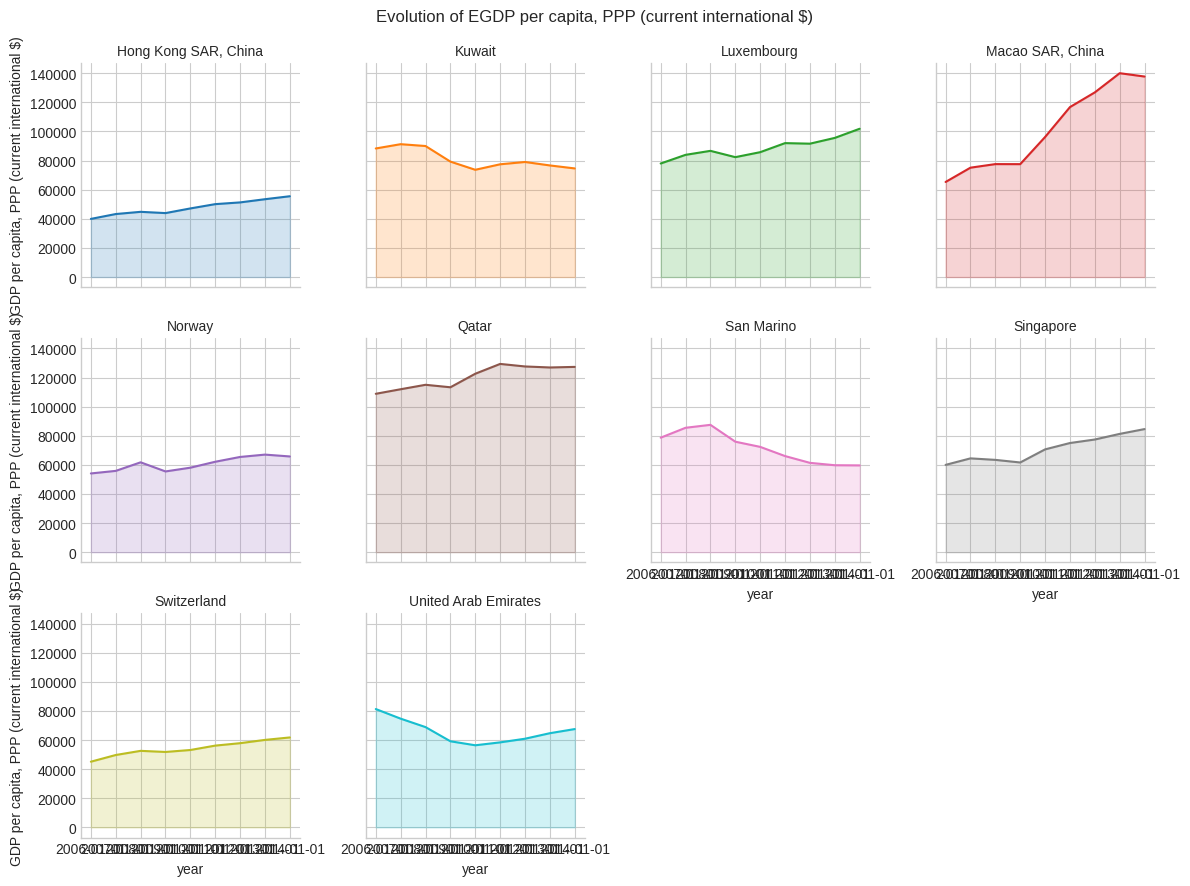

<Figure size 640x480 with 0 Axes>

In [989]:

# Create a grid : initialize it
g = sns.FacetGrid(final_df, col='Country Name', hue='Country Name', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'year', 'GDP per capita, PPP (current international $)')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'year', 'GDP per capita, PPP (current international $)', alpha=0.2).set_titles("{col_name} country")

# Control the title of each facet
g = g.set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of EGDP per capita, PPP (current international $)')

# Show the graph
plt.show()
plt.savefig("fig3.png")

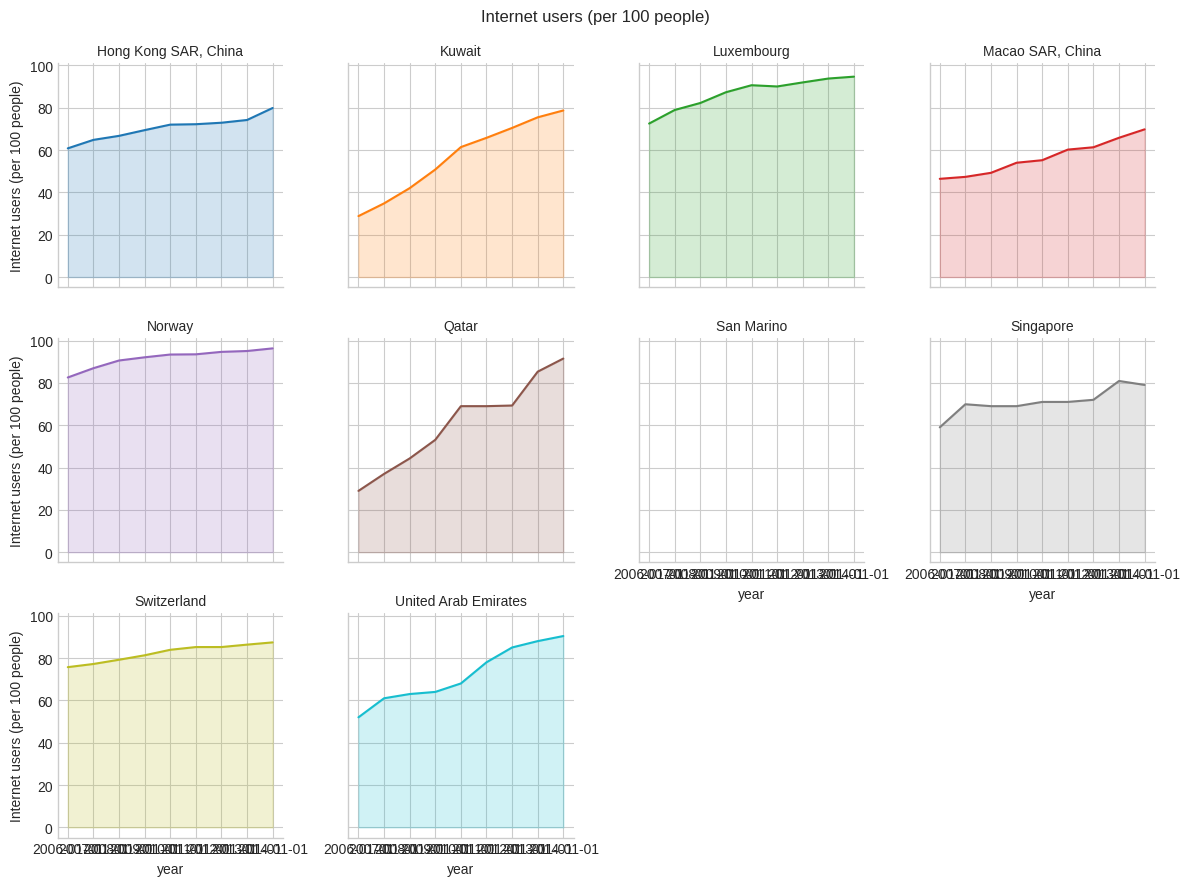

In [1045]:
# libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Create a grid : initialize it
g = sns.FacetGrid(final_df, col='Country Name', hue='Country Name', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'year', 'Internet users (per 100 people)')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'year',  'Internet users (per 100 people)', alpha=0.2).set_titles("{col_name} country")

# Control the title of each facet
g = g.set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Internet users (per 100 people)')

# Show the graph
plt.show()

In [990]:
qatar= final_df.loc[final_df['Country Name']=='Qatar']
qatar

Indicator Name,year,Country Name,Country Code_x,"GDP per capita, PPP (current international $)",Internet users (per 100 people),Population growth (annual %),"Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, ages 15-24, total","Population, total"
155,2006-01-01,Qatar,QAT,108831.252401,28.974113,15.551264,NaN,58655.0,NaN,113326.0,1010382.0
365,2007-01-01,Qatar,QAT,111959.861509,37.000000,16.331638,NaN,89483.0,NaN,114814.0,1189633.0
575,2008-01-01,Qatar,QAT,115012.450334,44.300000,15.518540,NaN,114905.0,NaN,115611.0,1389342.0
785,2009-01-01,Qatar,QAT,113312.852224,53.100000,13.539421,NaN,133191.0,NaN,116403.0,1590780.0
995,2010-01-01,Qatar,QAT,122609.410776,69.000000,11.220686,NaN,140613.0,NaN,117679.0,1779676.0
1205,2011-01-01,Qatar,QAT,129349.916352,69.000000,9.245083,NaN,133994.0,NaN,119587.0,1952054.0
1415,2012-01-01,Qatar,QAT,127610.208824,69.300000,7.760104,NaN,155712.0,NaN,121955.0,2109568.0
1625,2013-01-01,Qatar,QAT,126913.035408,85.300000,6.465723,NaN,174096.0,NaN,124579.0,2250473.0
1835,2014-01-01,Qatar,QAT,127313.494355,91.490000,5.361236,NaN,187392.0,NaN,127132.0,2374419.0


In [991]:
macao= final_df.loc[final_df['Country Name']=='Macao SAR']
luxembourg= final_df.loc[final_df['Country Name']=='Luxembourg']
singapore= final_df.loc[final_df['Country Name']=='Singapore']
kuwait= final_df.loc[final_df['Country Name']=='Kuwait']
united_arab_emirates= final_df.loc[final_df['Country Name']=='United Arab Emirates']
norway= final_df.loc[final_df['Country Name']=='Norway']
switzerland= final_df.loc[final_df['Country Name']=='Switzerland']
san_marino= final_df.loc[final_df['Country Name']=='San Marino']
hong_kong= final_df.loc[final_df['Country Name']=='Hong Kong SAR, China']

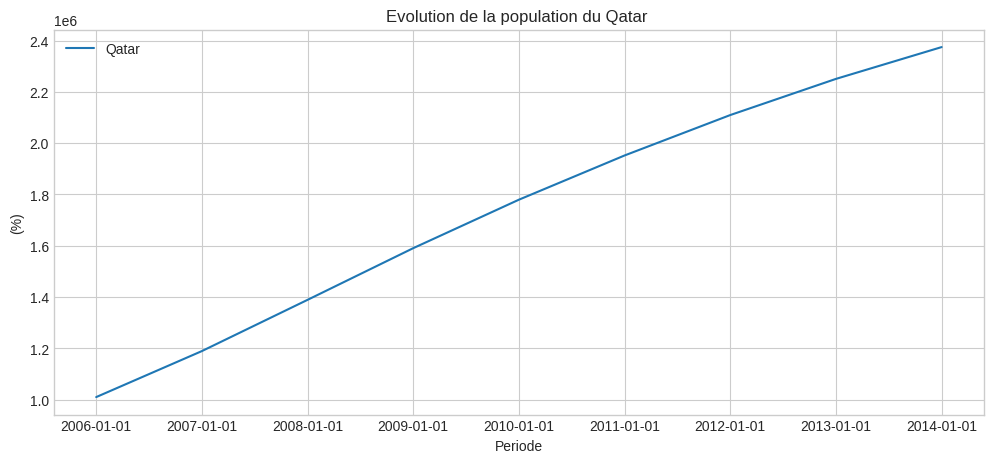

In [992]:
# Evolution de la pop  dans le temps, exemple
plt.figure( figsize = ( 12, 5))
plt.title('Evolution de la population du Qatar ')
sns.lineplot( x = 'year',
             y = 'Population, total',
             data = qatar,
             label = 'Qatar')

plt.xlabel('Periode')

plt.ylabel('(%)')
plt.savefig("g1.png")

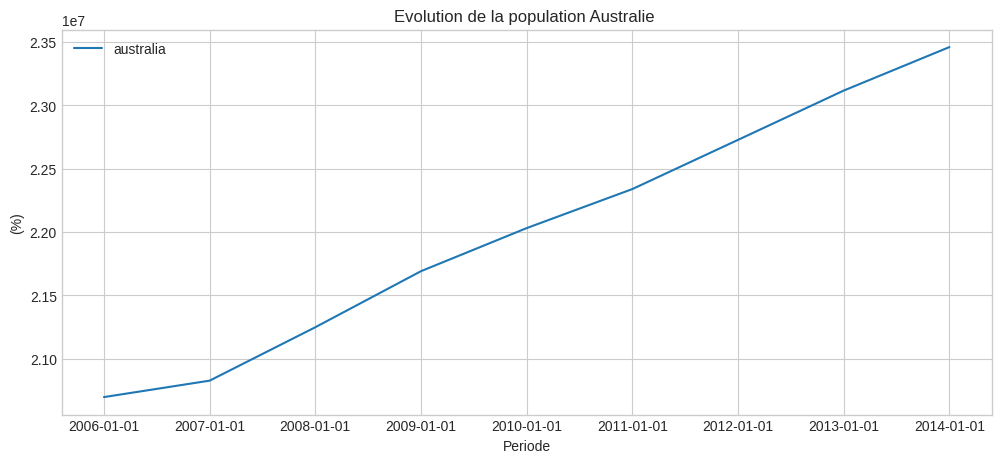

In [993]:
# Evolution de la pop  dans le temps, exemple
plt.figure( figsize = ( 12, 5))
plt.title('Evolution de la population Australie ')
sns.lineplot( x = 'year',
             y = 'Population, total',
             data = australia,
             label = 'australia')

plt.xlabel('Periode')

plt.ylabel('(%)')
plt.savefig("g1.png")

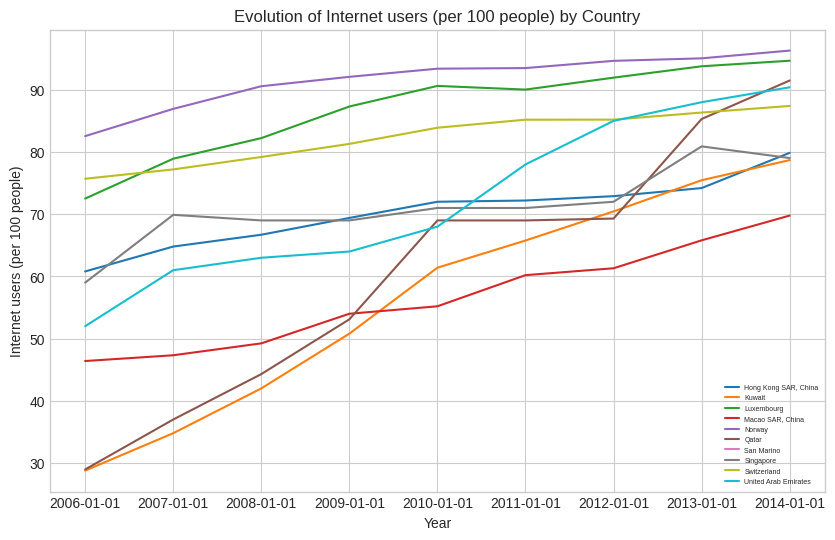

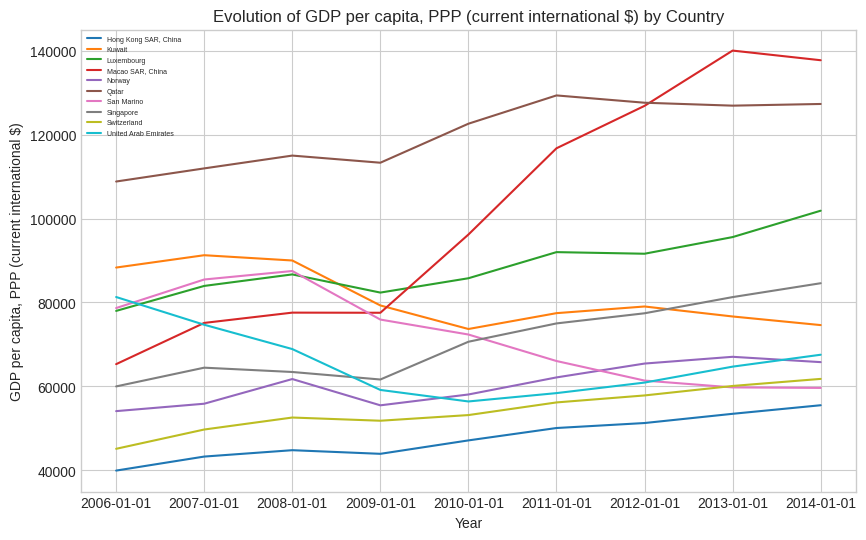

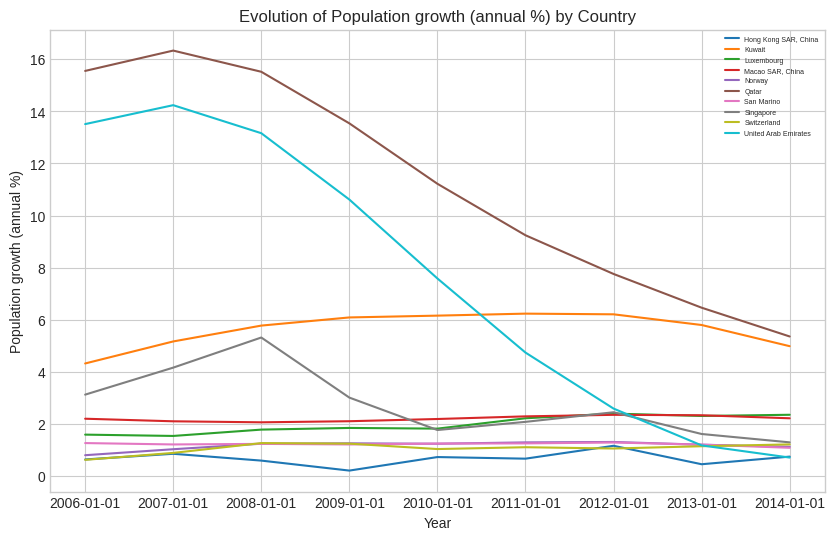

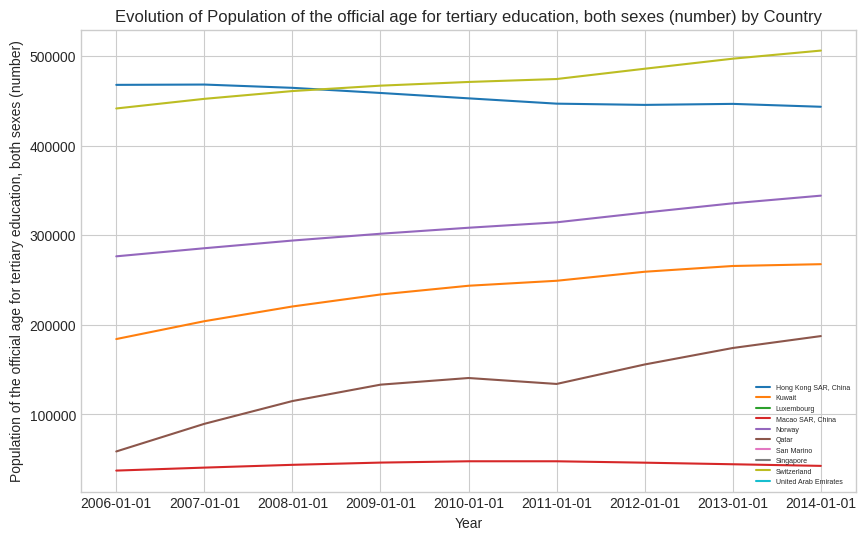

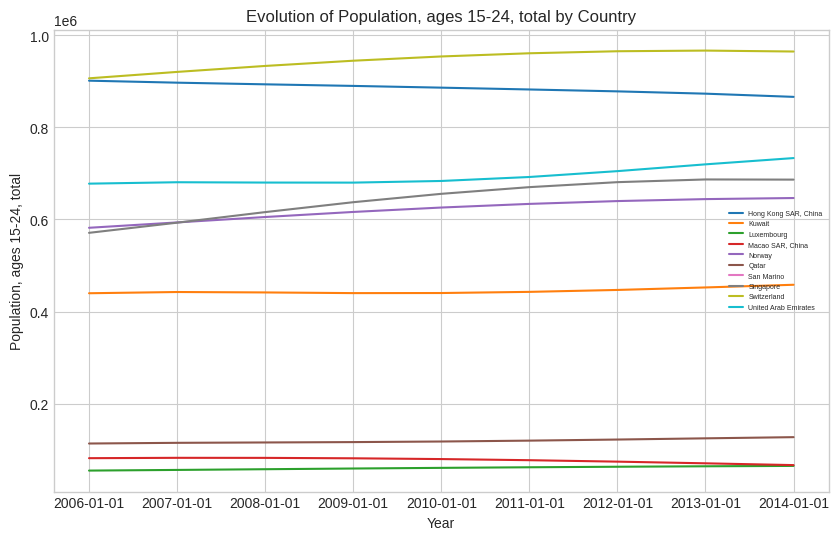

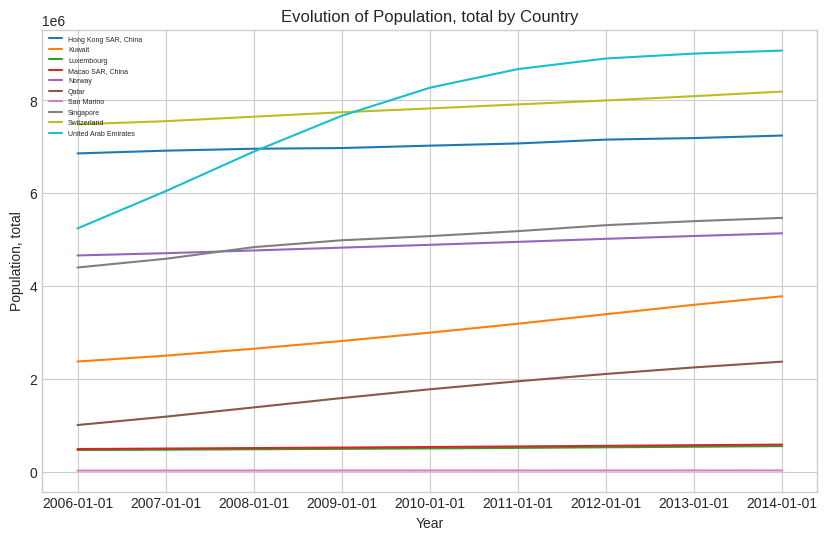

In [994]:
plot_indicator_evolution(final_df, "Internet users (per 100 people)" , start_year="2006-01-01")

plot_indicator_evolution(final_df, "GDP per capita, PPP (current international $)", start_year="2006-01-01")

plot_indicator_evolution(final_df, "Population growth (annual %)" , start_year="2006-01-01")

plot_indicator_evolution(final_df, 'Population of the official age for tertiary education, both sexes (number)', start_year="2006-01-01" )

plot_indicator_evolution(final_df, 'Population, ages 15-24, total', start_year="2006-01-01" )

plot_indicator_evolution(final_df, 'Population, total', start_year="2006-01-01" )


In [995]:
final_df.isna().mean()

Indicator Name
year                                                                                 0.0
Country Name                                                                         0.0
Country Code_x                                                                       0.0
GDP per capita, PPP (current international $)                                        0.0
Internet users (per 100 people)                                                      0.1
Population growth (annual %)                                                         0.0
Population of the official age for secondary education, both sexes (number)          0.3
Population of the official age for tertiary education, both sexes (number)           0.4
Population of the official age for upper secondary education, both sexes (number)    0.3
Population, ages 15-24, total                                                        0.1
Population, total                                                                    0.0
dtype:

In [996]:
gdp_qatar=qatar.rename(columns = {'year': 'ds', 'GDP per capita, PPP (current international $)': 'y'})
gdp_qatar

Indicator Name,ds,Country Name,Country Code_x,y,Internet users (per 100 people),Population growth (annual %),"Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, ages 15-24, total","Population, total"
155,2006-01-01,Qatar,QAT,108831.252401,28.974113,15.551264,NaN,58655.0,NaN,113326.0,1010382.0
365,2007-01-01,Qatar,QAT,111959.861509,37.000000,16.331638,NaN,89483.0,NaN,114814.0,1189633.0
575,2008-01-01,Qatar,QAT,115012.450334,44.300000,15.518540,NaN,114905.0,NaN,115611.0,1389342.0
785,2009-01-01,Qatar,QAT,113312.852224,53.100000,13.539421,NaN,133191.0,NaN,116403.0,1590780.0
995,2010-01-01,Qatar,QAT,122609.410776,69.000000,11.220686,NaN,140613.0,NaN,117679.0,1779676.0
1205,2011-01-01,Qatar,QAT,129349.916352,69.000000,9.245083,NaN,133994.0,NaN,119587.0,1952054.0
1415,2012-01-01,Qatar,QAT,127610.208824,69.300000,7.760104,NaN,155712.0,NaN,121955.0,2109568.0
1625,2013-01-01,Qatar,QAT,126913.035408,85.300000,6.465723,NaN,174096.0,NaN,124579.0,2250473.0
1835,2014-01-01,Qatar,QAT,127313.494355,91.490000,5.361236,NaN,187392.0,NaN,127132.0,2374419.0


In [997]:
gdp_macao= macao.rename(columns = {'year': 'ds', 'GDP per capita, PPP (current international $)': 'y'})
gdp_luxembourg= luxembourg.rename(columns = {'year': 'ds', 'GDP per capita, PPP (current international $)': 'y'})
gdp_singapore= singapore.rename(columns = {'year': 'ds', 'GDP per capita, PPP (current international $)': 'y'})
gdp_kuwait= kuwait.rename(columns = {'year': 'ds', 'GDP per capita, PPP (current international $)': 'y'})
gdp_united_arab_emirates= united_arab_emirates.rename(columns = {'year': 'ds', 'GDP per capita, PPP (current international $)': 'y'})
gdp_norway= norway.rename(columns = {'year': 'ds', 'GDP per capita, PPP (current international $)': 'y'})
gdp_switzerland= switzerland.rename(columns = {'year': 'ds', 'GDP per capita, PPP (current international $)': 'y'})
gdp_san_marino= san_marino.rename(columns = {'year': 'ds', 'GDP per capita, PPP (current international $)': 'y'})
gdp_hong_kong= hong_kong.rename(columns = {'year': 'ds', 'GDP per capita, PPP (current international $)': 'y'})

In [998]:
gdp_final_df= final_df.rename(columns = {'year': 'ds', 'GDP per capita, PPP (current international $)': 'y'})


In [999]:
gdp_qatar.drop(['Country Code_x','Country Name',  'Internet users (per 100 people)',
                        'Population growth (annual %)','Population of the official age for secondary education, both sexes (number)',
                        'Population of the official age for tertiary education, both sexes (number)',
                        'Population of the official age for upper secondary education, both sexes (number)','Population, ages 15-24, total', 'Population, total'],
                         axis=1, inplace = True)

gdp_qatar

Indicator Name,ds,y
155,2006-01-01,108831.252401
365,2007-01-01,111959.861509
575,2008-01-01,115012.450334
785,2009-01-01,113312.852224
995,2010-01-01,122609.410776
1205,2011-01-01,129349.916352
1415,2012-01-01,127610.208824
1625,2013-01-01,126913.035408
1835,2014-01-01,127313.494355


In [1000]:
gdp_final_df.drop(['Country Code_x','Country Name',  'Internet users (per 100 people)',
                        'Population growth (annual %)','Population of the official age for secondary education, both sexes (number)',
                        'Population of the official age for tertiary education, both sexes (number)',
                        'Population of the official age for upper secondary education, both sexes (number)','Population, ages 15-24, total', 'Population, total'],
                         axis=1, inplace = True)

In [1001]:
gdp_hong_kong.drop(['Country Code_x','Country Name',  'Internet users (per 100 people)',
                        'Population growth (annual %)','Population of the official age for secondary education, both sexes (number)',
                        'Population of the official age for tertiary education, both sexes (number)',
                        'Population of the official age for upper secondary education, both sexes (number)','Population, ages 15-24, total', 'Population, total'],
                         axis=1, inplace = True)

gdp_kuwait.drop(['Country Code_x','Country Name',  'Internet users (per 100 people)',
                        'Population growth (annual %)','Population of the official age for secondary education, both sexes (number)',
                        'Population of the official age for tertiary education, both sexes (number)',
                        'Population of the official age for upper secondary education, both sexes (number)','Population, ages 15-24, total', 'Population, total'],
                         axis=1, inplace = True)

gdp_luxembourg.drop(['Country Code_x','Country Name', 'Internet users (per 100 people)',
                        'Population growth (annual %)','Population of the official age for secondary education, both sexes (number)',
                        'Population of the official age for tertiary education, both sexes (number)',
                        'Population of the official age for upper secondary education, both sexes (number)','Population, ages 15-24, total', 'Population, total'],
                         axis=1, inplace = True)

gdp_macao.drop(['Country Code_x','Country Name', 'Internet users (per 100 people)',
                        'Population growth (annual %)','Population of the official age for secondary education, both sexes (number)',
                        'Population of the official age for tertiary education, both sexes (number)',
                        'Population of the official age for upper secondary education, both sexes (number)','Population, ages 15-24, total', 'Population, total'],
                         axis=1, inplace = True)

gdp_norway.drop(['Country Code_x','Country Name',  'Internet users (per 100 people)',
                        'Population growth (annual %)','Population of the official age for secondary education, both sexes (number)',
                        'Population of the official age for tertiary education, both sexes (number)',
                        'Population of the official age for upper secondary education, both sexes (number)','Population, ages 15-24, total', 'Population, total'],
                         axis=1, inplace = True)

gdp_san_marino.drop(['Country Code_x','Country Name',  'Internet users (per 100 people)',
                        'Population growth (annual %)','Population of the official age for secondary education, both sexes (number)',
                        'Population of the official age for tertiary education, both sexes (number)',
                        'Population of the official age for upper secondary education, both sexes (number)','Population, ages 15-24, total', 'Population, total'],
                         axis=1, inplace = True)

gdp_singapore.drop(['Country Code_x','Country Name',  'Internet users (per 100 people)',
                        'Population growth (annual %)','Population of the official age for secondary education, both sexes (number)',
                        'Population of the official age for tertiary education, both sexes (number)',
                        'Population of the official age for upper secondary education, both sexes (number)','Population, ages 15-24, total', 'Population, total'],
                         axis=1, inplace = True)

gdp_switzerland.drop(['Country Code_x','Country Name',  'Internet users (per 100 people)',
                        'Population growth (annual %)','Population of the official age for secondary education, both sexes (number)',
                        'Population of the official age for tertiary education, both sexes (number)',
                        'Population of the official age for upper secondary education, both sexes (number)','Population, ages 15-24, total', 'Population, total'],
                         axis=1, inplace = True)

gdp_united_arab_emirates.drop(['Country Code_x','Country Name',  'Internet users (per 100 people)',
                        'Population growth (annual %)','Population of the official age for secondary education, both sexes (number)',
                        'Population of the official age for tertiary education, both sexes (number)',
                        'Population of the official age for upper secondary education, both sexes (number)','Population, ages 15-24, total', 'Population, total'],
                         axis=1, inplace = True)

**DERNIERE ETAPE : PREDICTIONS **

In [1002]:
from prophet import Prophet

In [1003]:
m = Prophet()
m.fit(gdp_qatar)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/i887pmqv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/8635mx12.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87244', 'data', 'file=/tmp/tmp9rarjm9c/i887pmqv.json', 'init=/tmp/tmp9rarjm9c/8635mx12.json', 'output', 'file=/tmp/tmp9rarjm9c/prophet_model_kdf8u_d/prophet_model-20230705215654.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:56:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:56:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [1005]:
h = Prophet()
h.fit(gdp_hong_kong)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/sy6br_k6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/paesyduv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72377', 'data', 'file=/tmp/tmp9rarjm9c/sy6br_k6.json', 'init=/tmp/tmp9rarjm9c/paesyduv.json', 'output', 'file=/tmp/tmp9rarjm9c/prophet_modelwde6t8a1/prophet_model-20230705215723.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:57:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:57:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [1008]:
l = Prophet()
l.fit(gdp_luxembourg)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/obgqlwu8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/aee55joi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12196', 'data', 'file=/tmp/tmp9rarjm9c/obgqlwu8.json', 'init=/tmp/tmp9rarjm9c/aee55joi.json', 'output', 'file=/tmp/tmp9rarjm9c/prophet_modelf9qjrtoh/prophet_model-20230705215825.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:58:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:58:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [1009]:
s = Prophet()
s.fit(gdp_singapore)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/hgs1i35b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/vwxaykc2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7343', 'data', 'file=/tmp/tmp9rarjm9c/hgs1i35b.json', 'init=/tmp/tmp9rarjm9c/vwxaykc2.json', 'output', 'file=/tmp/tmp9rarjm9c/prophet_modelfc10yfwi/prophet_model-20230705215850.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:58:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:58:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [1010]:

k = Prophet()
k.fit(gdp_kuwait)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/pn6tdas5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/nq4w_j12.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2604', 'data', 'file=/tmp/tmp9rarjm9c/pn6tdas5.json', 'init=/tmp/tmp9rarjm9c/nq4w_j12.json', 'output', 'file=/tmp/tmp9rarjm9c/prophet_modeldrkqveq4/prophet_model-20230705215906.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:59:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:59:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [1011]:
u = Prophet()
u.fit(gdp_united_arab_emirates)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/2oagnjzb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/26_f6p7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76103', 'data', 'file=/tmp/tmp9rarjm9c/2oagnjzb.json', 'init=/tmp/tmp9rarjm9c/26_f6p7v.json', 'output', 'file=/tmp/tmp9rarjm9c/prophet_modelltme58yq/prophet_model-20230705215923.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:59:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:59:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [1012]:
n = Prophet()
n.fit(gdp_norway)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/6e53rth_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/p9yoy8n4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15159', 'data', 'file=/tmp/tmp9rarjm9c/6e53rth_.json', 'init=/tmp/tmp9rarjm9c/p9yoy8n4.json', 'output', 'file=/tmp/tmp9rarjm9c/prophet_model61x9im7j/prophet_model-20230705215937.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:59:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:59:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [1013]:
sw = Prophet()
sw.fit(gdp_switzerland)

sm = Prophet()
sm.fit(gdp_san_marino)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/ci0rslev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rarjm9c/0o8yfinv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15604', 'data', 'file=/tmp/tmp9rarjm9c/ci0rslev.json', 'init=/tmp/tmp9rarjm9c/0o8yfinv.json', 'output', 'file=/tmp/tmp9rarjm9c/prophet_model1opnlrh5/prophet_model-20230705215958.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:59:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:59:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [1046]:
# Python
future = m.make_future_dataframe(periods=3, freq='Y')
future.tail()

# Python
future_h = h.make_future_dataframe(periods=3, freq='Y')
future_h.tail()

# Python
future_l = l.make_future_dataframe(periods=3, freq='Y')
future_l.tail()

# Python
future_s = s.make_future_dataframe(periods=3, freq='Y')
future_s.tail()

# Python
future_sw = k.make_future_dataframe(periods=3, freq='Y')
future_sw.tail()

,ds
7,2013-01-01
8,2014-01-01
9,2014-12-31
10,2015-12-31
11,2016-12-31


In [1019]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
7,2013-01-01,124922.238788,123128.907443,126835.675027
8,2014-01-01,129464.529125,127634.105333,131259.654760
9,2014-12-31,116865.040543,114932.285872,118722.909123
10,2015-12-31,109204.871138,107042.003056,111317.289022
11,2016-12-31,130845.736186,128216.110328,133277.617643


In [1020]:
# Python
forecast_h = h.predict(future)
forecast_h[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,2013-01-01,52574.328067,51830.585109,53286.558226
8,2014-01-01,55613.531477,54916.279111,56373.511453
9,2014-12-31,55384.428073,54653.515278,56031.955807
10,2015-12-31,55546.211159,54819.958586,56243.903106
11,2016-12-31,61850.496068,61143.658854,62579.874264


In [1023]:
forecast_s = s.predict(future)
forecast_s[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,2013-01-01,79176.453088,77543.278640,80758.985086
8,2014-01-01,85624.847779,84094.978463,87160.337274
9,2014-12-31,75005.676956,73456.494162,76502.457998
10,2015-12-31,70460.737832,68634.645838,72187.580645
11,2016-12-31,93930.567061,91879.591935,95909.551271


In [1047]:
forecast_sw = sw.predict(future)
forecast_sw[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,2013-01-01,59488.361608,58443.273177,60579.377140
8,2014-01-01,61385.515741,60369.302793,62488.107595
9,2014-12-31,70945.675071,69889.444057,71874.959304
10,2015-12-31,75883.889615,74890.371296,76893.307031
11,2016-12-31,70147.065681,69067.958352,71230.305609


In [1025]:
forecast_l = l.predict(future)
forecast_l[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,2013-01-01,94550.143102,92357.094588,97095.168311
8,2014-01-01,99732.121516,97334.281505,102250.329867
9,2014-12-31,96603.973277,94308.633847,99128.431836
10,2015-12-31,94914.994288,92560.392345,97372.597979
11,2016-12-31,108386.825774,105915.338627,110836.799681


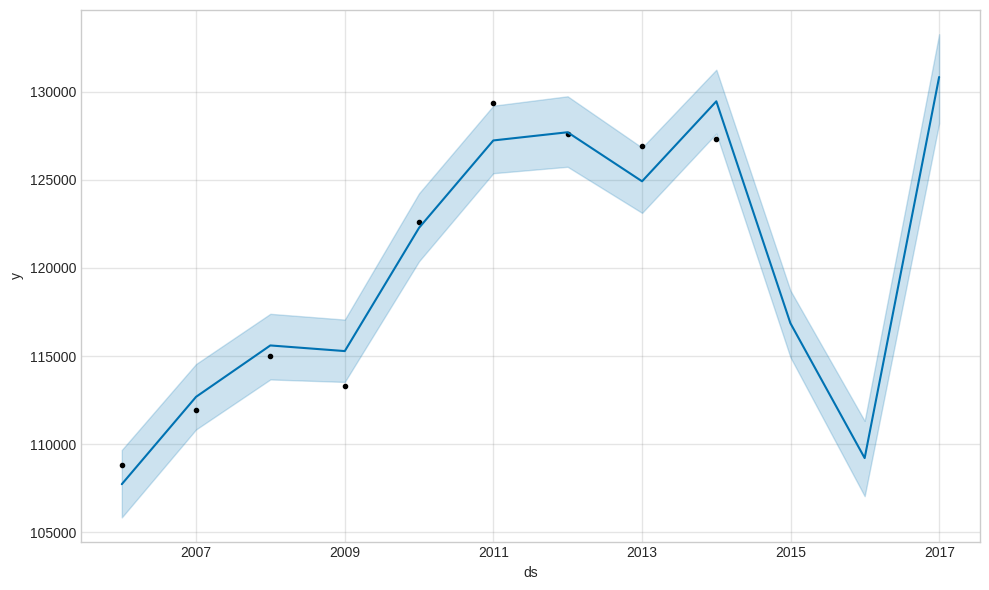

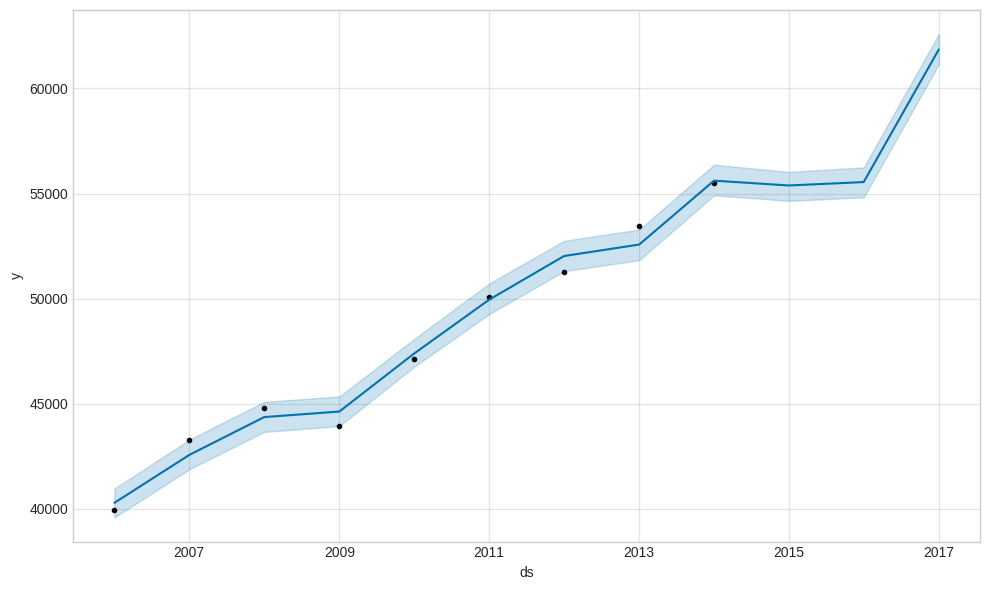

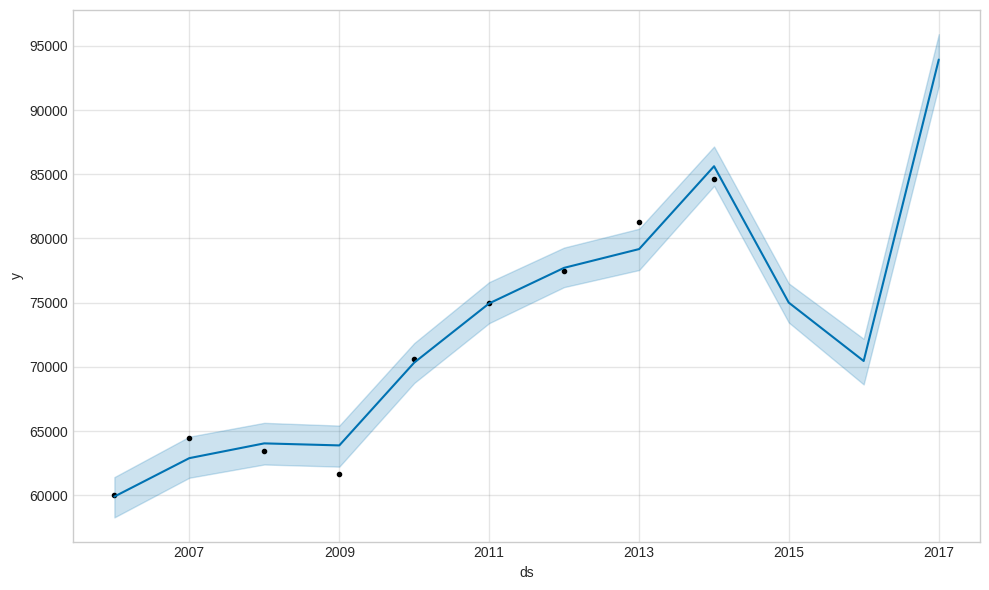

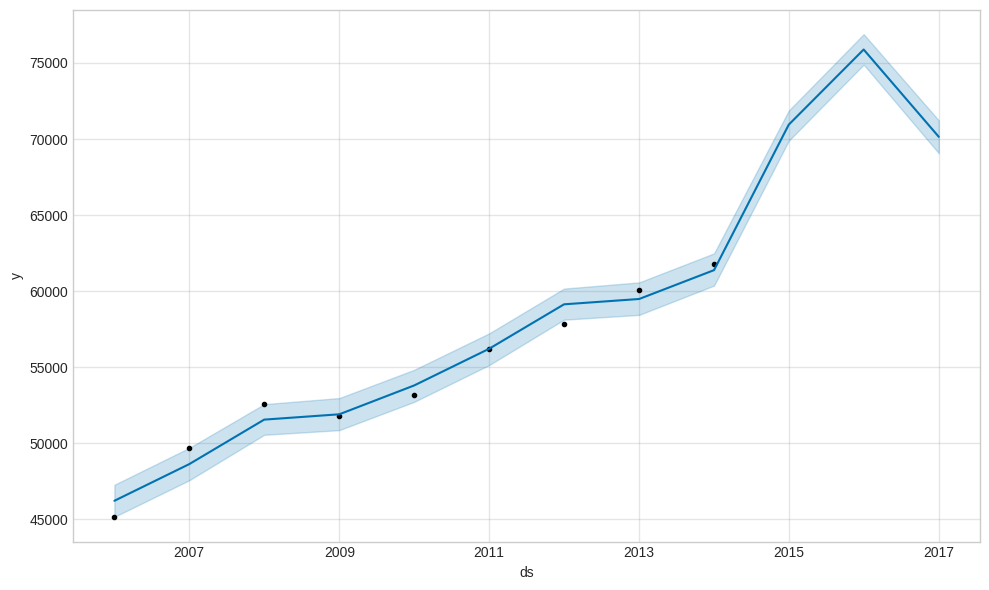

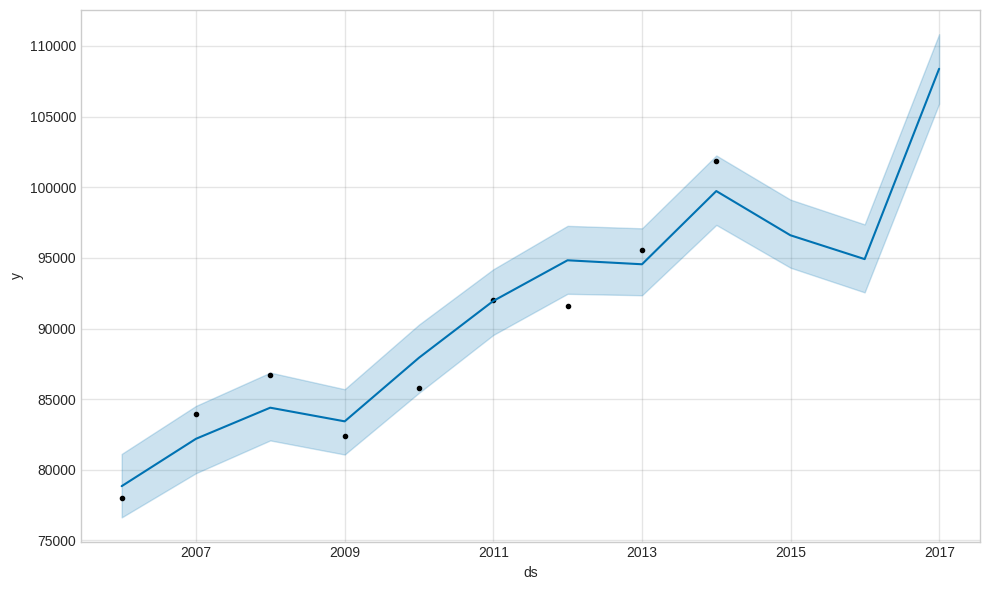

In [1048]:
# Python
fig1 = m.plot(forecast)
fig2 = h.plot(forecast_h)
fig3 = s.plot(forecast_s)
fig4 = sw.plot(forecast_sw)
fig5 = l.plot(forecast_l)

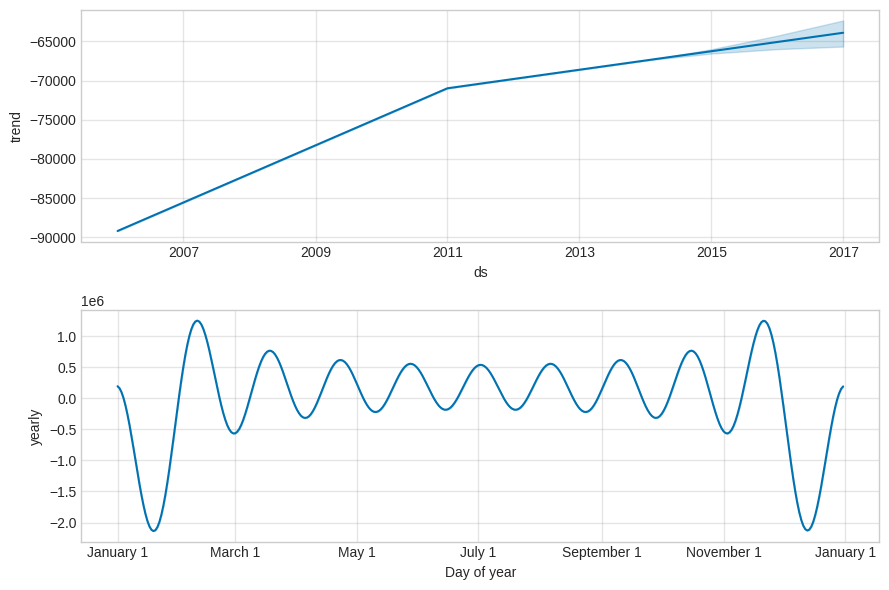

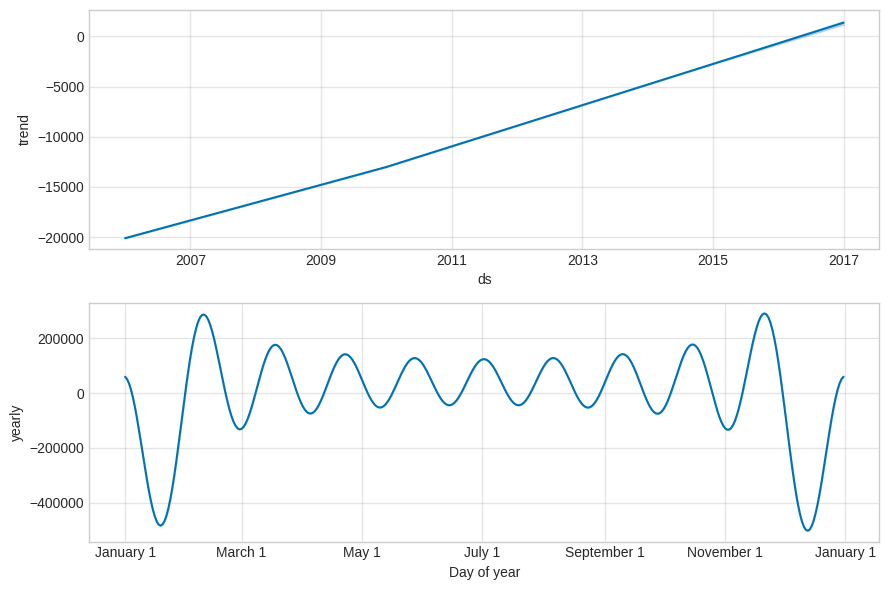

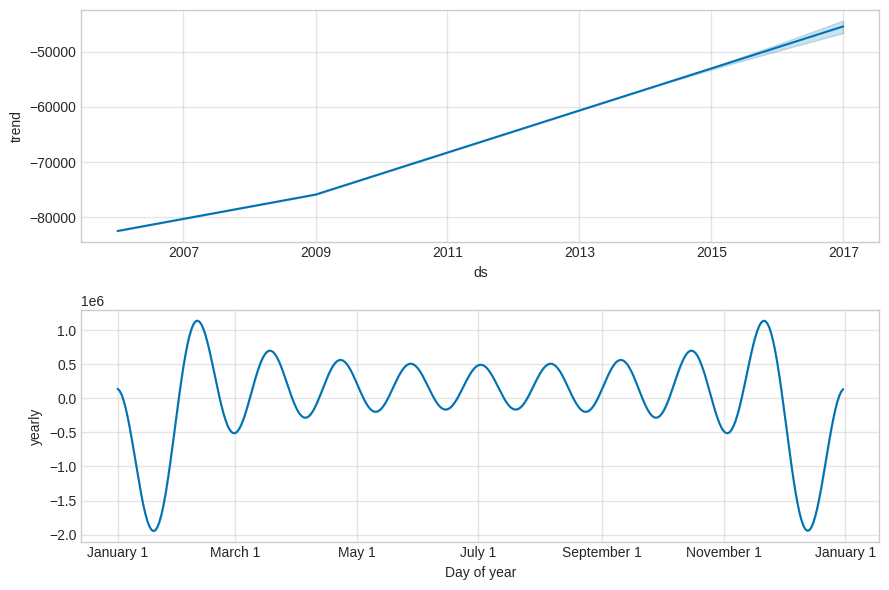

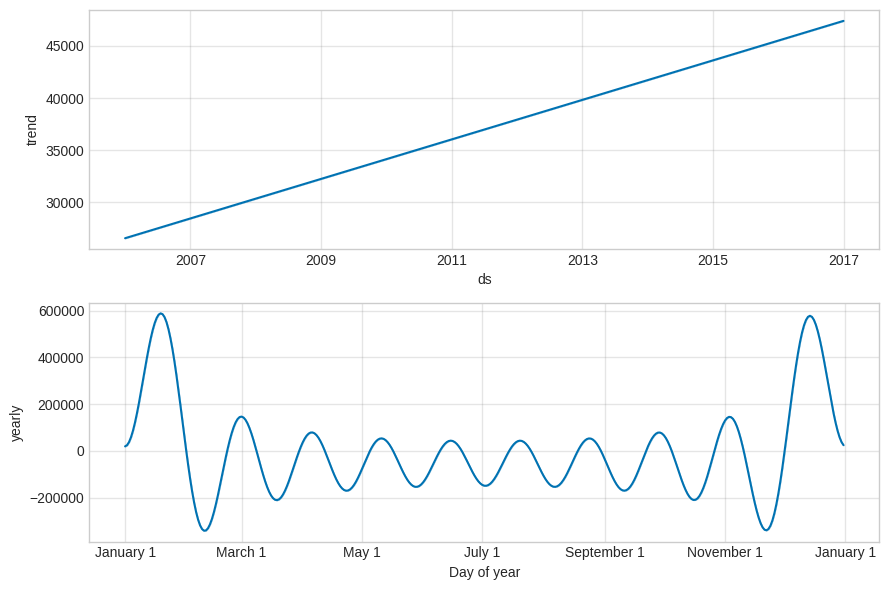

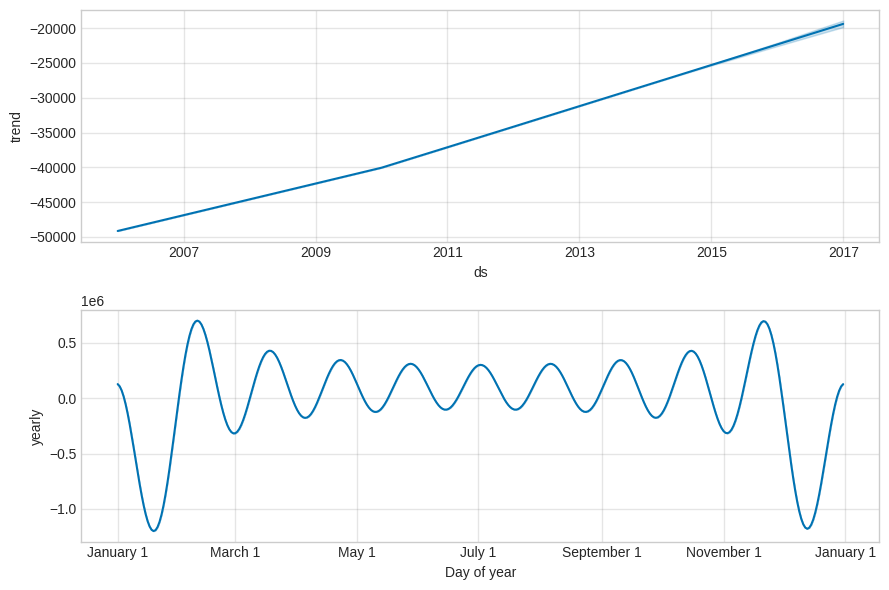

In [1049]:
# Python
figA = m.plot_components(forecast)
figB = h.plot_components(forecast_h)
figC = s.plot_components(forecast_s)
figD = sw.plot_components(forecast_sw)
figE = l.plot_components(forecast_l)

In [1030]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


In [1031]:
plot_plotly(h, forecast_h)

In [1034]:
plot_plotly(s, forecast_s)

In [1050]:
plot_plotly(sw, forecast_sw)

In [1036]:
plot_plotly(l, forecast_l)

In [1038]:
plot_components_plotly(m, forecast)

In [1039]:
plot_components_plotly(h, forecast_h)

In [1040]:
plot_components_plotly(s, forecast_s)

In [1041]:
plot_components_plotly(k, forecast_k)

In [1042]:
plot_components_plotly(l, forecast_l)